In [437]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import sklearn.datasets as datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from itertools import *

plt.rc('figure', figsize=(10, 10))

10. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

- More up days than down (56% Up)
- Correlation between volume and Year (0.84 Pearson's)
- No obvious relationship between any of the Lags and Direction.

In [9]:
weekly_dat = pd.read_csv('weekly.csv')
weekly_dat = weekly_dat.drop(weekly_dat.columns[0], axis=1)
weekly_dat['Direction'] = weekly_dat['Direction'].map({'Down' : 0, 'Up' :1})
weekly_dat.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1

In [11]:
weekly_dat.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today    Direction  
count  1089.000000  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899     0.555556  
std       2.361285     1.686636     2.356927     0.497132  
min     -18.195000     0.087465   -18.195000     0.000000  
25%      -1.166000     0.332022    -1.154000     0.000000  
50%       0.234000     1.002680     0.241000     1.000000  
75%       1.405000     2.053727     1.405000     1.000000  
max      12.026000     9.328214    12.026000     1.000000

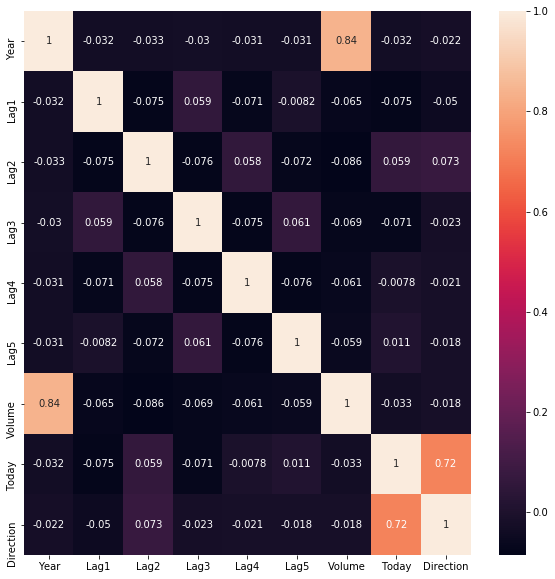

In [23]:
sns.heatmap(weekly_dat.corr(), annot=True)

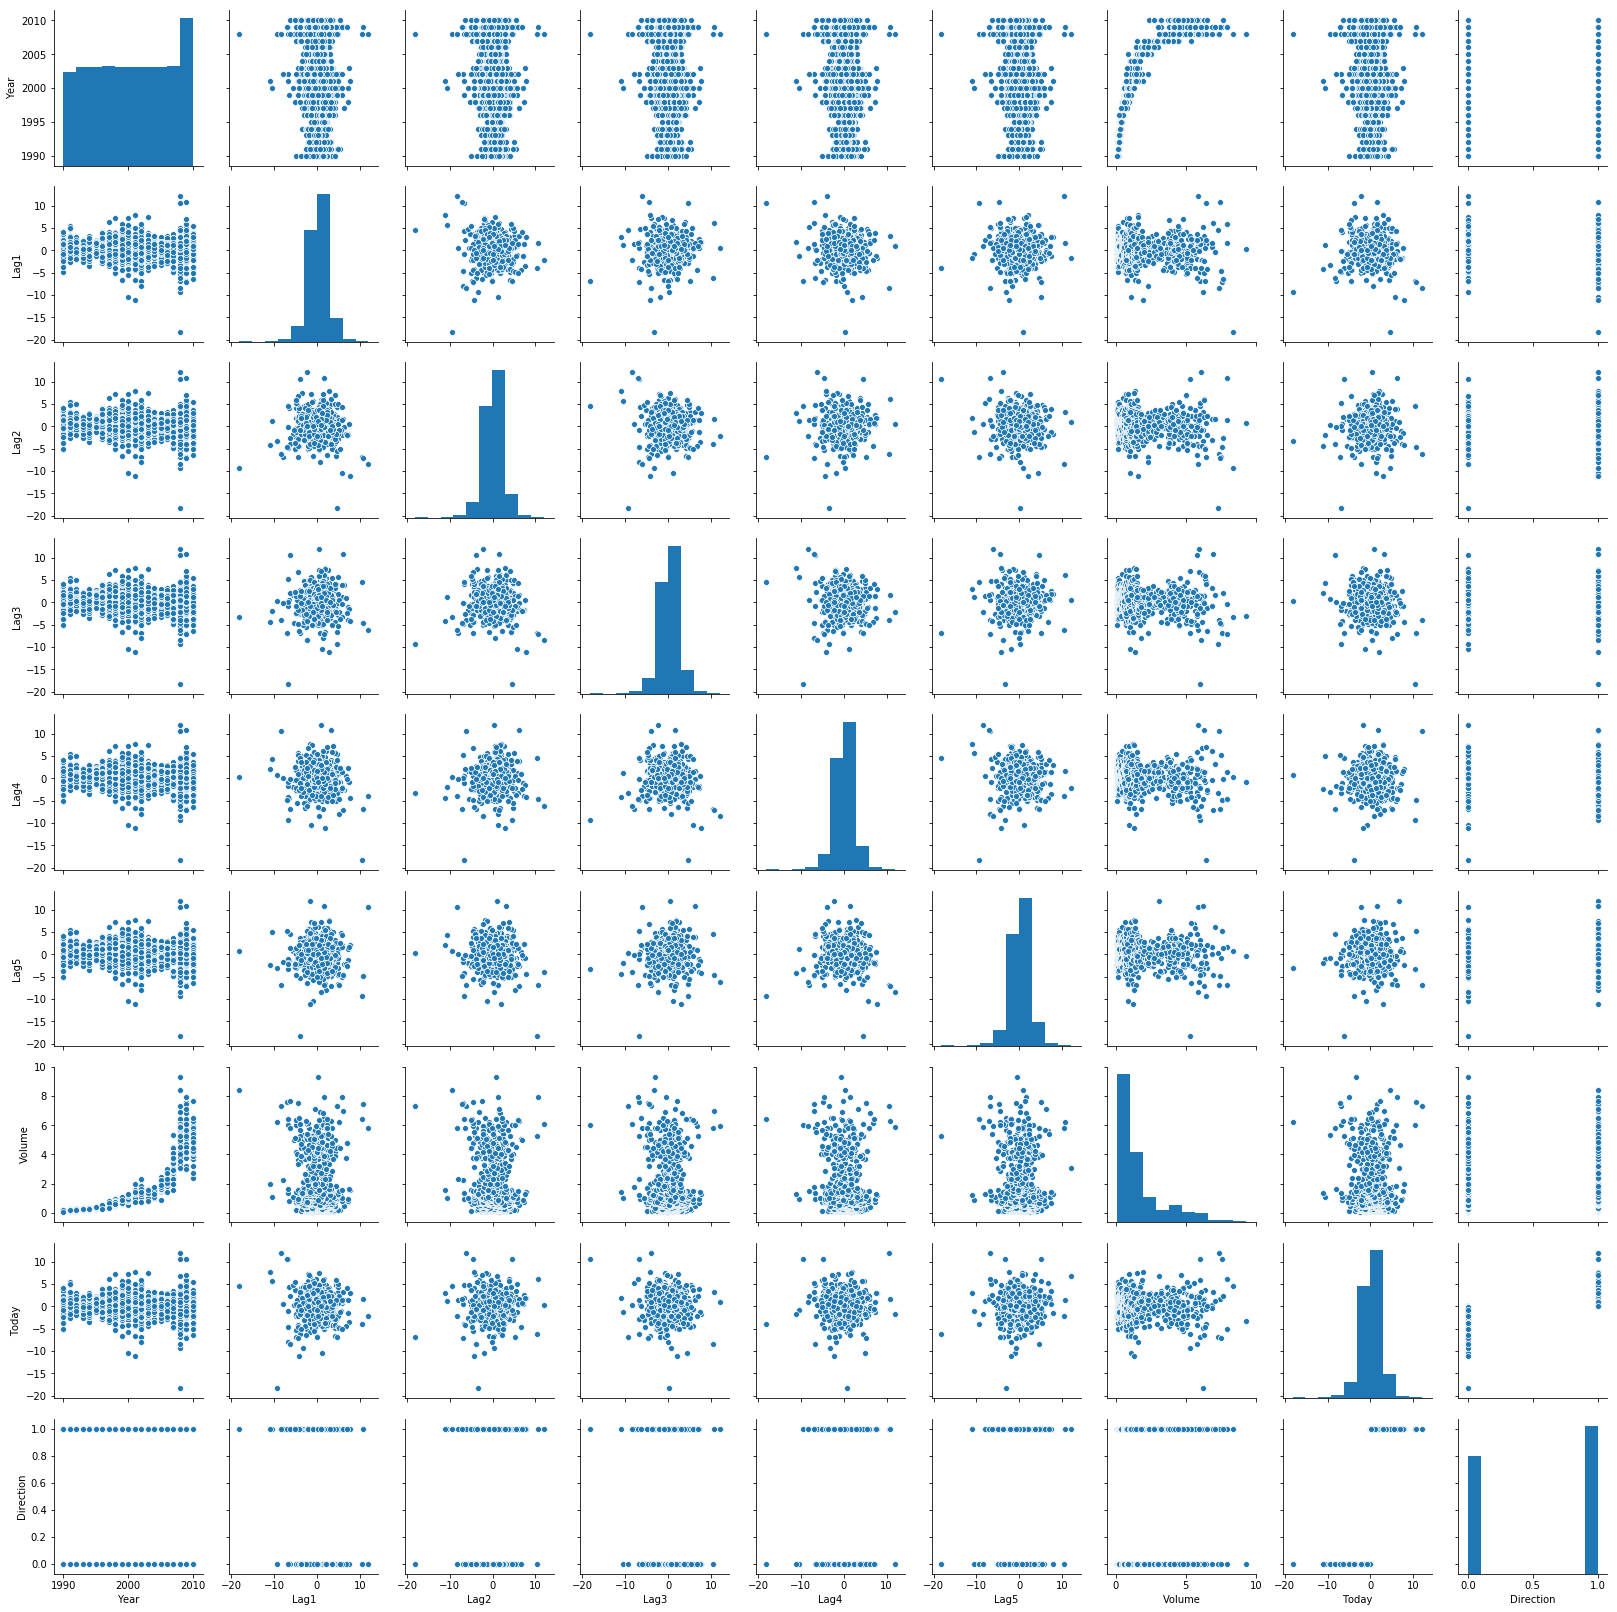

In [25]:
sns.pairplot(weekly_dat)

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

- Lag2 has a p-value of 0.030, indicating a statistically significant result. The coefficient for Lag2 is 0.0584; a unit increase in Lag2 is associated with a 0.0584 increase in the log-odds of today being an up day.

In [128]:
formula = 'Direction ~ ' + ' + '.join(weekly_dat.drop(['Direction', 'Today', 'Year'], axis=1).columns)
logit_model = smf.logit(formula=formula, data=weekly_dat).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                0.006580
Time:                        14:12:45   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

- Accuracy = (54 + 557) / (54 + 557 + 48 + 430) = 0.5610651974
- Negative Predictive Value: 54 / (54 + 48) = 0.5294117647
- Positive Predictive Value (Precision): 557 / (557 + 430) = 0.5643363728
- True Positive Rate (Sensitivity): 557 / (557 + 48) = 0.920661157
- True Negative Rate (Specificity): 54 / (54 + 430) = 0.1115702479

The overall prediction accuracy is 56% which is better than random guessing (50%) but the same as a naive classifier which always predicts Up (56%).

The negative predictive value is 53% - when the prediction is for a down day, it is correct 53% of the time.

The positive predicitve value is 56% - when the prediction is for a down day, it is correct 56% of the time.

The classifier has relatively high sensitivity - when the day is an up day, the classifier will have predicted an up day 92% of the time.

The classifier has low specificity - when the day is a down day, the classifier will have predicted a down day 11% of the time.


The classifier is producing a large number (430) of false positives relative to the number of false negatives (48). We could try and reduce the number of false positives by increasing the probability threshold - this would come at the cost of an increased number of false negatives and reduced overall accuracy.

In [113]:
def print_conf_matrix_stats(conf_mtrx):
    acc = (conf_mtrx[0][0] + conf_mtrx[1][1]) / (conf_mtrx[0][0] + conf_mtrx[0][1] + conf_mtrx[1][0] + conf_mtrx[1][1])
    npv = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[0][1]))
    ppv = (conf_mtrx[1][1] / (conf_mtrx[1][0] + conf_mtrx[1][1]))
    tpr = (conf_mtrx[1][1] / (conf_mtrx[0][1] + conf_mtrx[1][1]))
    tnr = (conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[1][0]))
    print('accuracy: {}'.format(acc))
    print('npv: {}'.format(npv))
    print('ppv: {}'.format(ppv))
    print('tpr: {}'.format(tpr))
    print('tnr: {}'.format(tnr))

In [114]:
preds = (logit_model.predict(weekly_dat) > 0.5)
conf_mtrx = metrics.confusion_matrix(preds, weekly_dat['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5537190082644629
npv: 0.4927536231884058
ppv: 0.562565720294427
tpr: 0.8842975206611571
tnr: 0.14049586776859505


Down   Up
Down    68   70
Up     416  535

In [240]:
preds = (logit_model.predict(weekly_dat) > 0.6)
conf_mtrx = metrics.confusion_matrix(preds, weekly_dat['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.472910927456382
npv: 0.453416149068323
ppv: 0.6260162601626016
tpr: 0.12727272727272726
tnr: 0.9049586776859504


Down   Up
Down   438  528
Up      46   77

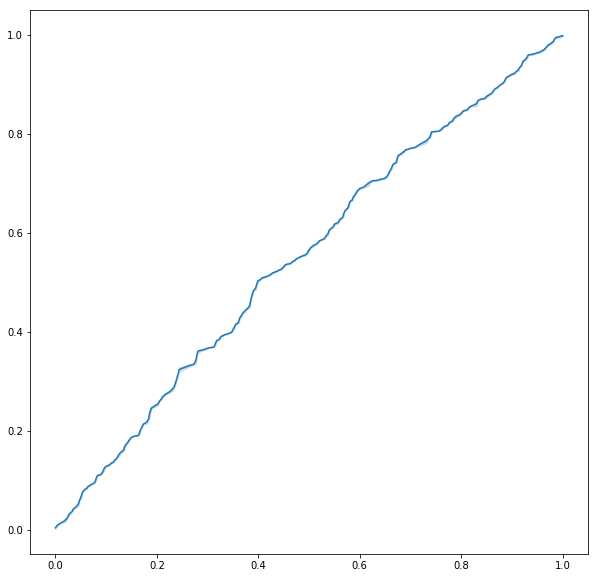

In [246]:
fpr, tpr, thresh = metrics.roc_curve(weekly_dat['Direction'], logit_model.predict(weekly_dat))
sns.lineplot(x=fpr, y=tpr)

# The ROC plot looks like the `No Information` line.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [248]:
pre = weekly_dat[weekly_dat['Year'] < 2008]
post = weekly_dat[weekly_dat['Year'] >= 2008]
formula = 'Direction ~ Lag2'
logit_model = smf.logit(formula=formula, data=pre).fit()
preds = (logit_model.predict(post) > 0.5)
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
accuracy: 0.5512820512820513
npv: 0.5833333333333334
ppv: 0.5486111111111112
tpr: 0.9404761904761905
tnr: 0.09722222222222222


Down  Up
Down     7   5
Up      65  79

(e) Repeat (d) using LDA.

In [260]:
lda = LinearDiscriminantAnalysis()
lda.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = lda.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5448717948717948
npv: 0.5454545454545454
ppv: 0.5448275862068965
tpr: 0.9404761904761905
tnr: 0.08333333333333333


Down  Up
Down     6   5
Up      66  79

(f) Repeat (d) using QDA.

In [261]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = qda.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.5384615384615384
npv: nan
ppv: 0.5384615384615384
tpr: 1.0
tnr: 0.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Down  Up
Down     0   0
Up      72  84

(g) Repeat (d) using KNN with K = 1.

In [262]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pd.DataFrame(pre['Lag2']), pre['Direction'])
preds = knn.predict(pd.DataFrame(post['Lag2']))
conf_mtrx = metrics.confusion_matrix(preds, post['Direction'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index=['Down', 'Up'])

accuracy: 0.4935897435897436
npv: 0.4507042253521127
ppv: 0.5294117647058824
tpr: 0.5357142857142857
tnr: 0.4444444444444444


Down  Up
Down    32  39
Up      40  45

In [265]:
# naive 'always up' classifier on test set
(post['Direction'] == 1).mean()

0.5384615384615384

(h) Which of these methods appears to provide the best results on
this data?

**Logistic Regression**
- accuracy: 0.5512820512820513
- npv: 0.5833333333333334
- ppv: 0.5486111111111112
- tpr: 0.9404761904761905
- tnr: 0.09722222222222222

**LDA**
- accuracy: 0.5448717948717948
- npv: 0.5454545454545454
- ppv: 0.5448275862068965
- tpr: 0.9404761904761905
- tnr: 0.08333333333333333

**QDA**
- accuracy: 0.5384615384615384
- npv: nan
- ppv: 0.5384615384615384
- tpr: 1.0
- tnr: 0.0

**KNN (k=1)**
- accuracy: 0.4935897435897436
- npv: 0.4507042253521127
- ppv: 0.5294117647058824
- tpr: 0.5357142857142857
- tnr: 0.4444444444444444

Logistic has the highest overall prediction accuracy (55%) on this data.

(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

**Logistic Regression**

In [285]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def logistic_reg_acc(formula):
    logit_model = smf.logit(formula=formula, data=pre).fit()
    preds = (logit_model.predict(post) > 0.5)
    return (preds == post['Direction']).mean()

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    formula = 'Direction ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)

Optimization terminated successfully.
         Current function value: 0.685000
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686122
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684933
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686244
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684039
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684850
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684664
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683546
  

[[0.5833333333333334, 'Direction ~ Lag1 + Lag2 + Lag4 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 + Lag3 + Lag4 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag2 + Lag3 + Lag4'],
 [0.5705128205128205, 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Volume'],
 [0.5641025641025641, 'Direction ~ Lag1'],
 [0.5641025641025641, 'Direction ~ Lag2 + Volume'],
 [0.5641025641025641, 'Direction ~ Lag2 + Lag3 + Volume'],
 [0.5576923076923077, 'Direction ~ Lag2 + Lag4'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag2 + Volume'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag3 + Lag4'],
 [0.5576923076923077, 'Direction ~ Lag2 + Lag3 + Lag5'],
 [0.5576923076923077, 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4'],
 [0.5512820512820513, 'Direction ~ Lag2'],
 [0.5512820512820513, 'Direction ~ Lag1 + Lag3'],
 [0.5512820512820513, 'Direction ~ Lag1 + Volume'],
 [0.5512820512820513, 'Direction ~ Lag2 + Lag3'],
 [0.5512820512820513, 'Direction ~ Lag2 + Lag5'],
 [0.5512820512820513, 'Direction ~ Lag1 + Lag2 + Lag

In [290]:
# Try all (2 ^ 6) - 1 combinations of independent variables with all possible
# formulae containing one interaction term

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    # no interactions
    formula = 'Direction ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])
    # interactions
    if len(indi_var_combo) == 2:
        formula = 'Direction ~ ' + ' * '.join(indi_var_combo)
    elif len(indi_var_combo) > 2:
        choose_2 = list(combinations(indi_var_combo, 2))
        for pair in choose_2:
            rem = set(indi_var_combo) - set(pair)
            formula = 'Direction ~ ' + ' * '.join(pair) + ' + ' + ' + '.join(rem)
            res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)


Optimization terminated successfully.
         Current function value: 0.685000
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686122
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686014
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684933
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686244
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684039
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684850
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684664
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683546
  

Optimization terminated successfully.
         Current function value: 0.683697
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684063
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683719
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685060
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685683
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685640
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684420
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684694
  

Optimization terminated successfully.
         Current function value: 0.682343
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682541
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683062
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682634
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684609
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684497
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683863
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684609
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683895
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684605
  

Optimization terminated successfully.
         Current function value: 0.683194
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682567
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683161
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681862
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681945
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681669
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681794
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681619
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681351
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681921
  

[[0.6025641025641025, 'Direction ~ Lag2 * Volume + Lag3 + Lag1'],
 [0.5833333333333334, 'Direction ~ Lag1 * Lag2 + Lag3 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 * Lag3 + Lag1 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag1 + Lag2 + Lag4 + Volume'],
 [0.5833333333333334, 'Direction ~ Lag2 * Volume + Lag4 + Lag1'],
 [0.5833333333333334, 'Direction ~ Lag2 + Lag3 + Lag4 + Volume'],
 [0.5769230769230769, 'Direction ~ Lag3 * Lag4 + Lag2'],
 [0.5769230769230769, 'Direction ~ Lag2 * Volume + Lag3'],
 [0.5769230769230769, 'Direction ~ Lag2 * Volume + Lag3 + Lag4'],
 [0.5769230769230769, 'Direction ~ Lag1 * Lag4 + Lag3 + Lag2 + Volume'],
 [0.5769230769230769, 'Direction ~ Lag1 * Volume + Lag3 + Lag2 + Lag4'],
 [0.5769230769230769, 'Direction ~ Lag3 * Lag4 + Lag2 + Lag1 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag1 * Lag2 + Volume'],
 [0.5705128205128205, 'Direction ~ Lag2 * Volume + Lag1'],
 [0.5705128205128205, 'Direction ~ Lag2 + Lag3 + Lag4'],
 [0.5705128205128205, 'Direc

The top 3 models for overall prediction accuracy:

- `0.6025641025641025`  `Direction ~ Lag2 * Volume + Lag3 + Lag1`

- `0.5833333333333334`  `Direction ~ Lag1 * Lag2 + Lag3 + Volume`

- `0.5833333333333334`  `Direction ~ Lag2 * Lag3 + Lag1 + Volume`

In [291]:
# Check out the best model for some more ideas
formula = 'Direction ~ Lag2 * Volume + Lag3 + Lag1'
logit_model = smf.logit(formula=formula, data=pre).fit()
logit_model.summary()
# ..no statistically significant coefficients.

Optimization terminated successfully.
         Current function value: 0.683877
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  933
Model:                          Logit   Df Residuals:                      927
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                0.003541
Time:                        16:48:07   Log-Likelihood:                -638.06
converged:                       True   LL-Null:                       -640.32
                                        LLR p-value:                    0.4753
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2653      0.103      2.574      0.010       0.063       0.467
Lag2            0.0367      0.056      0.660      0.509      -0.072       0.146
Volume         -0.0256      0.078     -0.329      0.742      -0.178       0.127
Lag2:Volume     0.0044      0.041      0.108      0.914      -0.075       0.084
Lag3           -0.0144      0.032     -0.445      0.656      -0.078       0.049
Lag1           -0.0471      0.033     -1.443      0.149      -0.111       0.017
===============================================================================
"""

In [292]:
# Volume is left skewed in the pairplot, see if taking logs improves accuracy
formula = 'Direction ~ Lag2 * np.log(Volume) + Lag3 + Lag1'
logistic_reg_acc(formula=formula)
# .. it does, new best score: 0.6153846153846154

Optimization terminated successfully.
         Current function value: 0.683536
         Iterations 4


0.6153846153846154

**LDA**

In [231]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def lda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    lda = LinearDiscriminantAnalysis()
    lda.fit(pre[indi_vars], pre['Direction'])
    preds = lda.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    indi_var_combo
    res.append([lda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

# Gives same result as logistic regression without interaction terms

[[0.5833333333333334, ('Lag1', 'Lag2', 'Lag4', 'Volume')],
 [0.5833333333333334, ('Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5705128205128205, ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5641025641025641, ('Lag2', 'Volume')],
 [0.5641025641025641, ('Lag1', 'Lag2', 'Volume')],
 [0.5641025641025641, ('Lag2', 'Lag3', 'Lag4')],
 [0.5576923076923077, ('Lag1',)],
 [0.5576923076923077, ('Lag2', 'Lag4')],
 [0.5576923076923077, ('Lag2', 'Lag5')],
 [0.5576923076923077, ('Lag1', 'Lag3', 'Lag4')],
 [0.5576923076923077, ('Lag2', 'Lag3', 'Lag5')],
 [0.5576923076923077, ('Lag2', 'Lag3', 'Volume')],
 [0.5576923076923077, ('Lag1', 'Lag2', 'Lag3', 'Lag4')],
 [0.5512820512820513, ('Lag1', 'Lag3')],
 [0.5512820512820513, ('Lag1', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag3')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag4')],
 [0.5512820512820513, ('Lag1', 'Lag4', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag4', 'Volume')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag3', 'Volume')],
 [0.55128205128

In [236]:
# The volume distribution is quite different from the other predictors, which violates
# the LDA assumption of a shared covariance matrix. Let's see if correcting this improves
# the prediction accuracy.

lda = LinearDiscriminantAnalysis()
pre_log_vol = pre.copy()
post_log_vol = post.copy()
pre_log_vol['Volume'] = np.log(pre_log_vol['Volume'])
post_log_vol['Volume'] = np.log(post_log_vol['Volume'])

lda.fit(pre_log_vol[['Lag1', 'Lag2', 'Lag4', 'Volume']], pre['Direction'])
preds = lda.predict(post_log_vol[['Lag1', 'Lag2', 'Lag4', 'Volume']])
(preds == post['Direction']).mean()

# .. it doesn't

0.5833333333333334

**QDA**

In [268]:
# Try all (2 ^ 6) - 1 combinations of independent variables

def qda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(pre[indi_vars], pre['Direction'])
    preds = qda.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    res.append([qda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

# - Worse than the logit and LDA models

[[0.5641025641025641, ('Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag3', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag2', 'Lag4', 'Lag5', 'Volume')],
 [0.5512820512820513, ('Lag1', 'Lag2', 'Lag4', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag3', 'Lag4')],
 [0.5448717948717948, ('Lag1', 'Lag3', 'Lag4')],
 [0.5448717948717948, ('Lag2', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag2', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag2', 'Lag3', 'Lag4', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5448717948717948, ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume')],
 [0.5384615384615384, ('Lag1',)],
 [0.5384615384615384, ('Lag2',)],
 [0.5384615384615384, ('Lag3',)],
 [0.5384615384615384, ('Lag5',)],
 [0.5384615384615384, ('Volume',)],
 [0.5384615384615384, ('Lag1', 'Lag3')],
 [0.5384615384615384, ('Lag1', 'Volume')],
 [0.5384615384615384, ('Lag2', 'Lag3')],
 [0.5384615384615384, ('Lag2', 'Volume')],
 [0.538

**KNN**

In [294]:
def knn_reg_acc(indi_vars, k):
    indi_vars = [v for v in indi_vars]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pd.DataFrame(pre[indi_vars]), pre['Direction'])
    preds = knn.predict(post[indi_vars])
    return (preds == post['Direction']).mean()

indi_vars = pre.drop(['Direction', 'Year', 'Today'], axis=1).columns

res = []
up_to_k = 50

for indi_var_combo in list(powerset(indi_vars))[1:]:
    for k in np.arange(1, up_to_k):
        res.append([knn_reg_acc(indi_var_combo, k), indi_var_combo, k])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.6346153846153846, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 16],
 [0.6282051282051282, ('Lag1', 'Lag2', 'Lag3'), 27],
 [0.6282051282051282, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 18],
 [0.6217948717948718, ('Lag5',), 28],
 [0.6217948717948718, ('Lag1', 'Lag2', 'Lag3'), 26],
 [0.6217948717948718, ('Lag2', 'Lag5', 'Volume'), 23],
 [0.6153846153846154, ('Lag5',), 22],
 [0.6153846153846154, ('Lag5',), 26],
 [0.6153846153846154, ('Lag2', 'Lag5', 'Volume'), 24],
 [0.6153846153846154, ('Lag2', 'Lag5', 'Volume'), 25],
 [0.6153846153846154, ('Lag1', 'Lag2', 'Lag3', 'Lag5', 'Volume'), 22],
 [0.6089743589743589, ('Lag4',), 11],
 [0.6089743589743589, ('Lag5',), 27],
 [0.6089743589743589, ('Lag1', 'Lag5'), 18],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag3'), 37],
 [0.6089743589743589, ('Lag2', 'Lag5', 'Volume'), 22],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag5', 'Volume'), 35],
 [0.6089743589743589, ('Lag1', 'Lag2', 'Lag5', 'Volume'), 36],
 [0.6089743589743589, ('Lag2', 'Lag3', 'Lag4', 'Lag5'), 17],
 [0.60

Several new winners, the top three knn models beat everything so far:

- `0.6346153846153846`  `'Lag2', 'Lag3', 'Lag4', 'Lag5'`  `k = 16`
- `0.6282051282051282`  `'Lag1', 'Lag2', 'Lag3'`          `k = 27`
- `0.6282051282051282`  `'Lag2', 'Lag3', 'Lag4', 'Lag5'`  `k = 18`

In [302]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(pd.DataFrame(pre[['Lag2', 'Lag3', 'Lag4', 'Lag5']]), pre['Direction'])
preds = knn.predict(post[['Lag2', 'Lag3', 'Lag4', 'Lag5']])
conf_mtrx = metrics.confusion_matrix(preds,post['Direction'])
print('Best Model:')
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index= ['Down', 'Up'])

Best Model:
accuracy: 0.6346153846153846
npv: 0.6119402985074627
ppv: 0.651685393258427
tpr: 0.6904761904761905
tnr: 0.5694444444444444


Down  Up
Down    41  26
Up      31  58

11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [328]:
auto_dat = pd.read_csv('auto.csv')
auto_dat['mpg01'] = (auto_dat['mpg'] > auto_dat['mpg'].median()).map({True : 1.0, False : 0.0})
hp = pd.to_numeric(auto_dat['horsepower'], downcast='float', errors='coerce')
hp = hp.fillna(value=hp.mean())
auto_dat['horsepower'] = hp
auto_dat.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu    0.0  
1       1          buick skylark 320    0.0  
2       1         plymouth satellite    0.0  
3       1              amc rebel sst    0.0  
4       1                ford torino    0.0

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

**Cylinders**
- There are only a small number of cars in the dataset with 3 or 5 cylinders.
- Cars with 4 cyclinders are much more likely to have higher than average mpg
- Cars with 6 or 8 cylinders are much more likely to have lower than average mpg

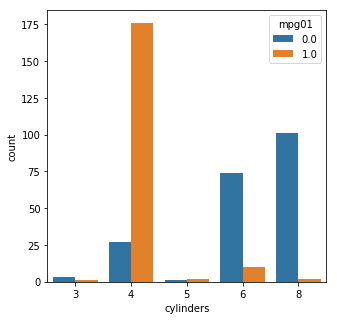

In [372]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='cylinders', hue='mpg01', data=auto_dat)

**Dispacement, Horsepower and Weight**
- Cars with lower than average mpg tend to have lower displacement, horsepower and weight - displacement gives the best seperation.

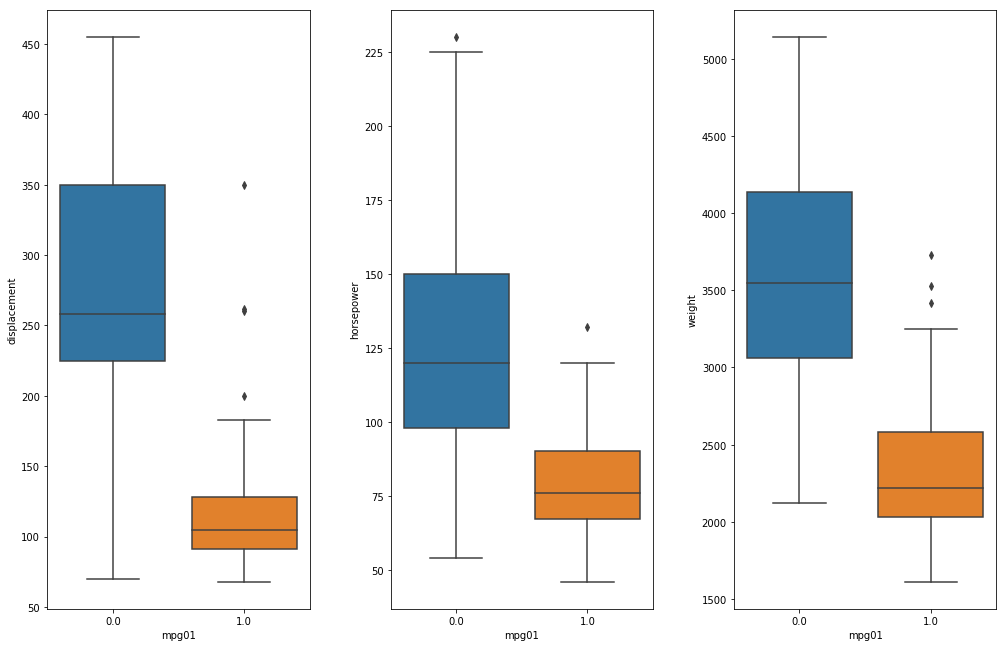

In [397]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,10))
fig.tight_layout(pad=5)
sns.boxplot(x='mpg01', y='displacement', data=auto_dat, ax=ax1)
sns.boxplot(x='mpg01', y='horsepower', data=auto_dat, ax=ax2)
sns.boxplot(x='mpg01', y='weight', data=auto_dat, ax=ax3)

**Acceleration**

- Cars with lower than average mpg tend to have marginally higher acceleration

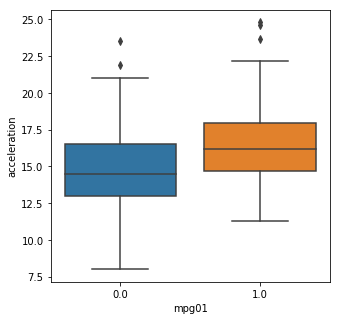

In [398]:
_, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='mpg01', y='acceleration', data=auto_dat)

**Year**

- The proportion of cars with higher than average mpg increases with Year

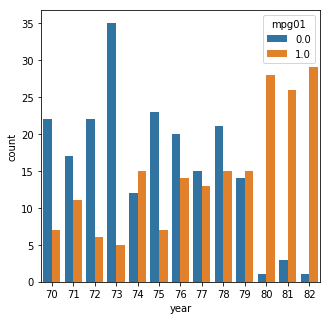

In [399]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='year', hue='mpg01', data=auto_dat)

**Origin**

- Cars with origin = 1 are likely to have worse than average mpg
- Cars with orgin = 2,3 are likely to have better than average mpg

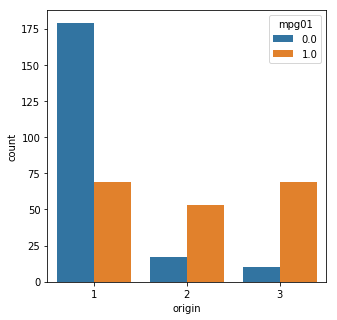

In [408]:
_, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax=ax, x='origin', hue='mpg01', data=auto_dat)

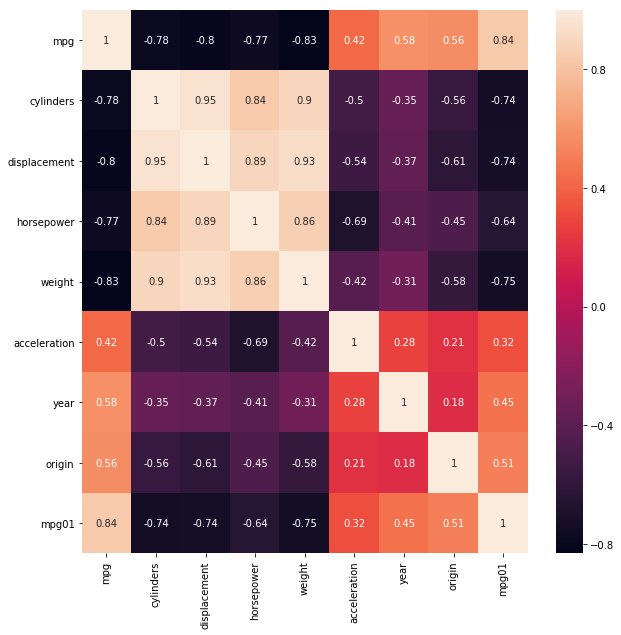

In [409]:
sns.heatmap(auto_dat.corr(),annot=True)

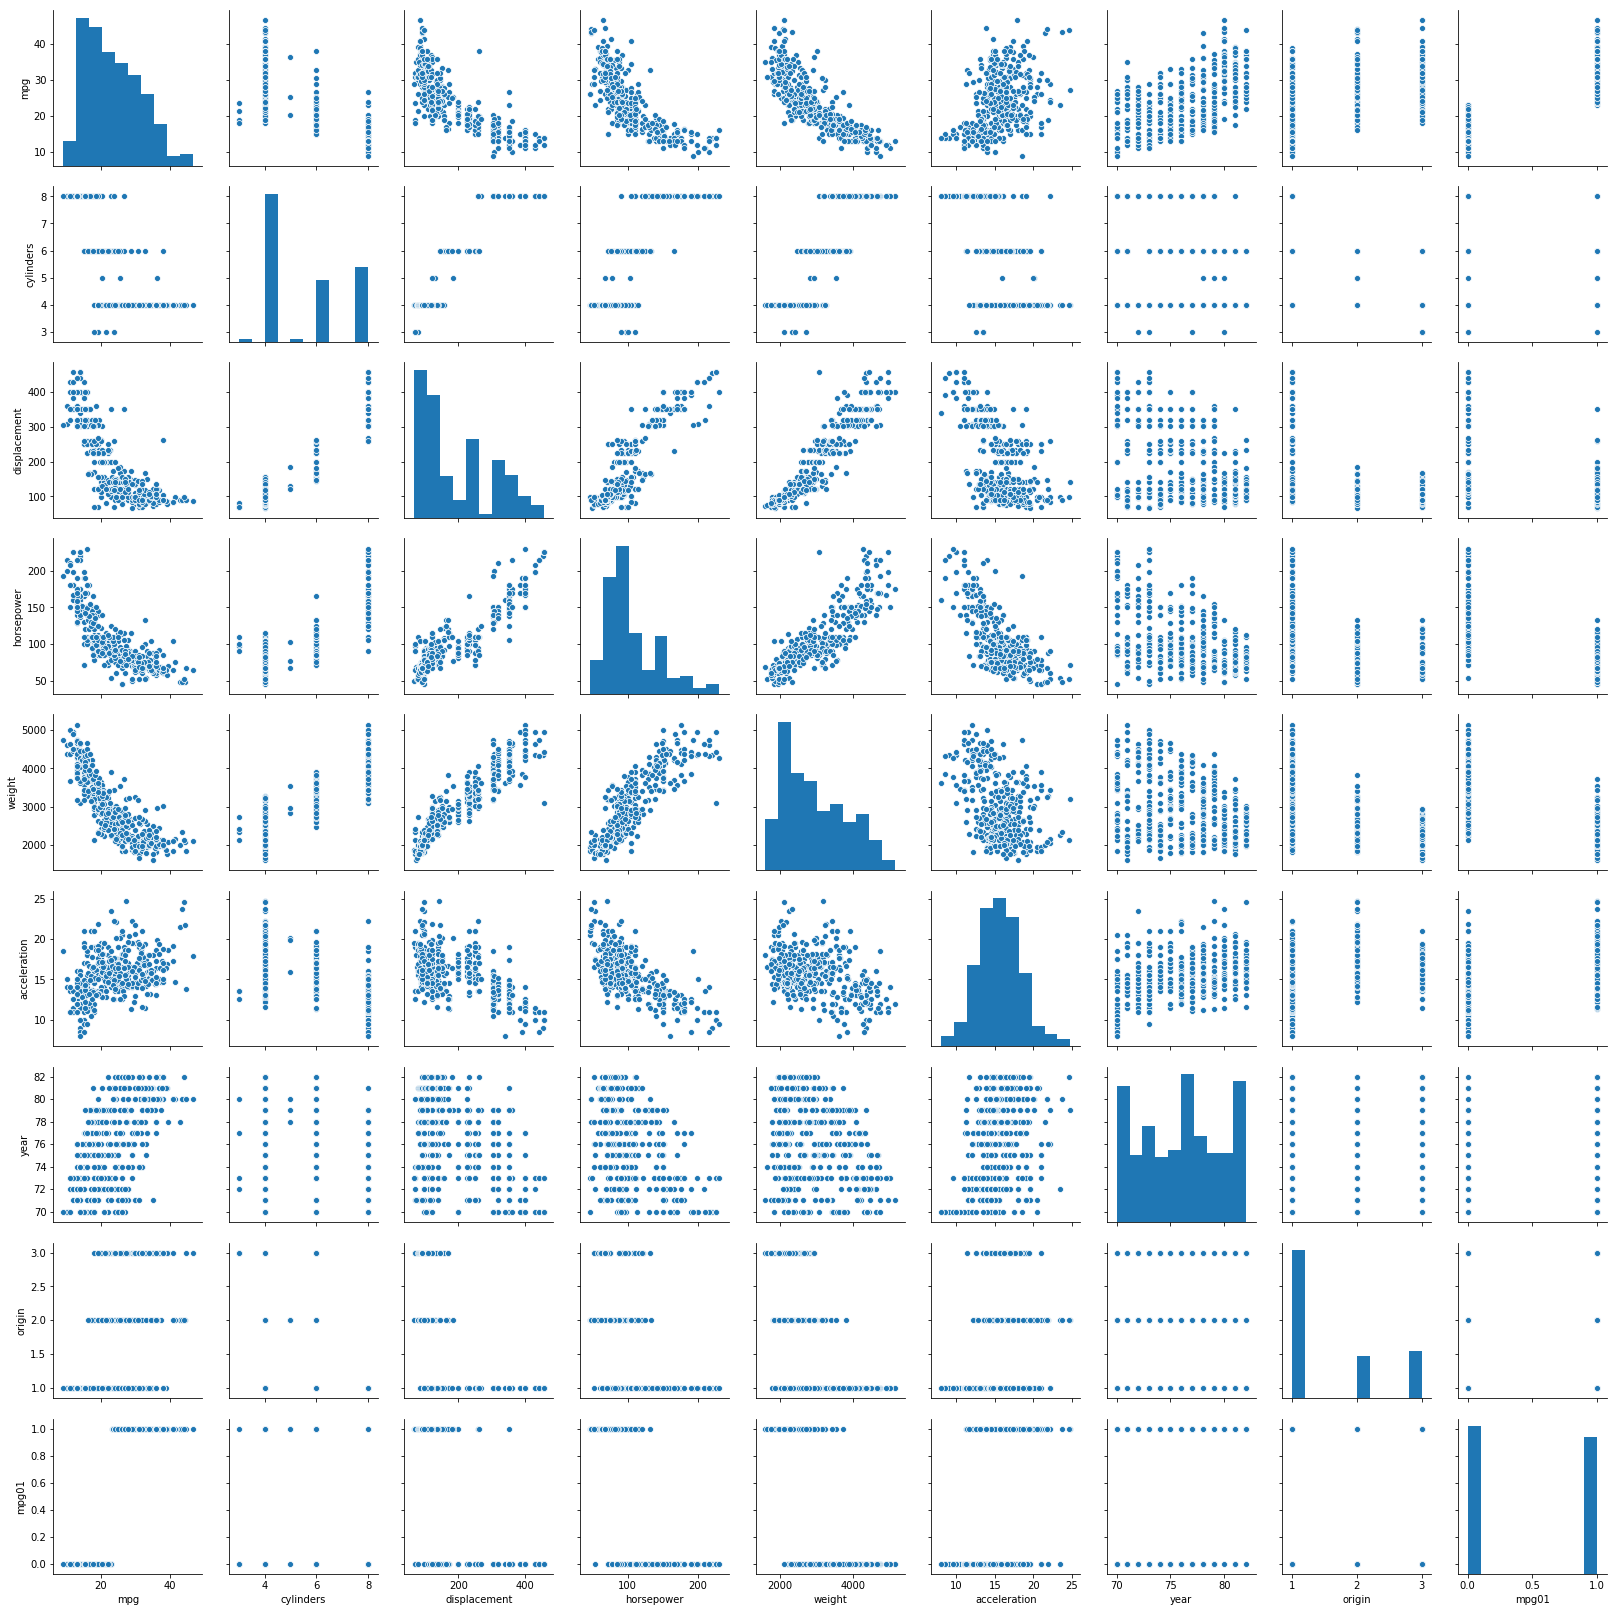

In [333]:
sns.pairplot(auto_dat)

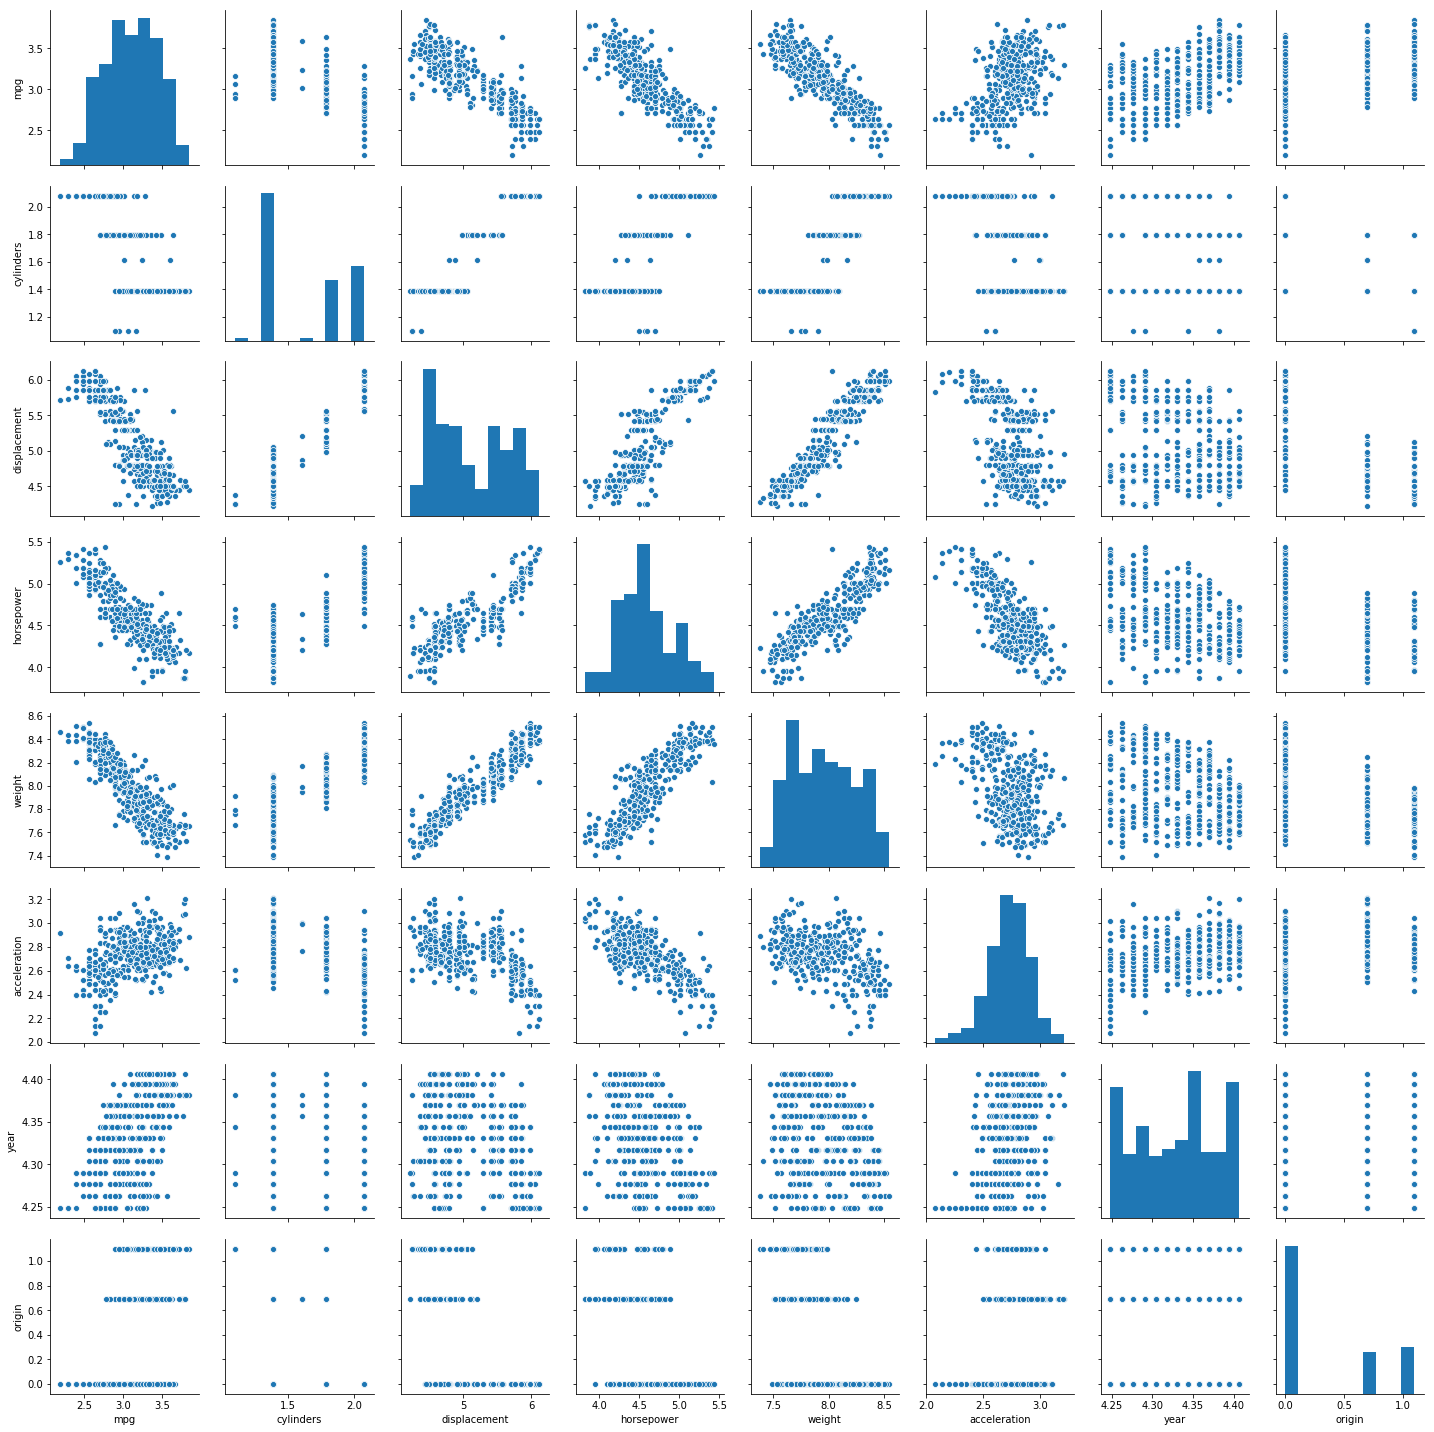

In [400]:
# Several of the relationships with mpg look log linear..
sns.pairplot(np.log(auto_dat.drop(['name', 'mpg01'], axis=1)))

(c) Split the data into a training set and a test set.

In [407]:
train, test = train_test_split(auto_dat, test_size=0.5)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [414]:
lda = LinearDiscriminantAnalysis()
lda.fit(train.drop(['mpg01', 'mpg', 'name'], axis=1), train['mpg01'])
preds = lda.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
(preds == test['mpg01']).mean()

0.9045226130653267

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [423]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train.drop(['mpg01', 'mpg', 'name'], axis=1), train['mpg01'])
preds = qda.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
(preds == test['mpg01']).mean()

0.9195979899497487

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [430]:
formula = 'mpg01 ~ ' + ' + '.join(train.drop(['mpg01', 'mpg', 'name'], axis=1).columns)
logit = smf.logit(formula=formula, data=train).fit()
preds = logit.predict(test.drop(['mpg01', 'mpg', 'name'], axis=1))
((preds > 0.5) ==  test['mpg01']).mean()

Optimization terminated successfully.
         Current function value: 0.171471
         Iterations 10


0.8894472361809045

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [435]:
def knn_reg_acc(indi_vars, k):
    indi_vars = [v for v in indi_vars]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pd.DataFrame(train[indi_vars]), train['mpg01'])
    preds = knn.predict(test[indi_vars])
    return (preds == test['mpg01']).mean()

indi_vars = train.drop(['mpg01', 'mpg', 'name'], axis=1).columns

res = []
up_to_k = 10

for indi_var_combo in list(powerset(indi_vars))[1:]:
    for k in np.arange(1, up_to_k):
        res.append([knn_reg_acc(indi_var_combo, k), indi_var_combo, k])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.9296482412060302, ('cylinders', 'year'), 4],
 [0.9296482412060302, ('displacement', 'acceleration', 'year', 'origin'), 3],
 [0.9296482412060302,
  ('cylinders', 'displacement', 'acceleration', 'year', 'origin'),
  3],
 [0.9246231155778895, ('cylinders', 'year'), 6],
 [0.9246231155778895, ('displacement', 'acceleration', 'year'), 3],
 [0.9246231155778895,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  3],
 [0.9195979899497487, ('displacement', 'acceleration', 'year'), 5],
 [0.9195979899497487, ('displacement', 'acceleration', 'year'), 6],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  5],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year'),
  6],
 [0.9195979899497487, ('displacement', 'acceleration', 'year', 'origin'), 5],
 [0.9195979899497487, ('displacement', 'acceleration', 'year', 'origin'), 6],
 [0.9195979899497487,
  ('cylinders', 'displacement', 'acceleration', 'year', 'origin'),
  5],
 [0.919597989949748

12. I'm leaving this out as it's an R syntax lesson and therefore not relevant to me.

13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various sub- sets of the predictors. Describe your findings.

In [544]:
boston = datasets.load_boston()
boston = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns= [c for c in boston['feature_names']] + ['Price'])
boston['CRIM01'] = (boston['CRIM'] > boston['CRIM'].median()).map({True : 1, False : 0})
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  CRIM01  
0     15.3  396.90   4.98   24.0       0  
1     17.8  396.90   9.14   21.6       0  
2     17.8  392.83   4.03   34.7       0  
3     18.7  394.63   2.94   33.4       0  
4     18.7  396.90   5.33   36.2       0

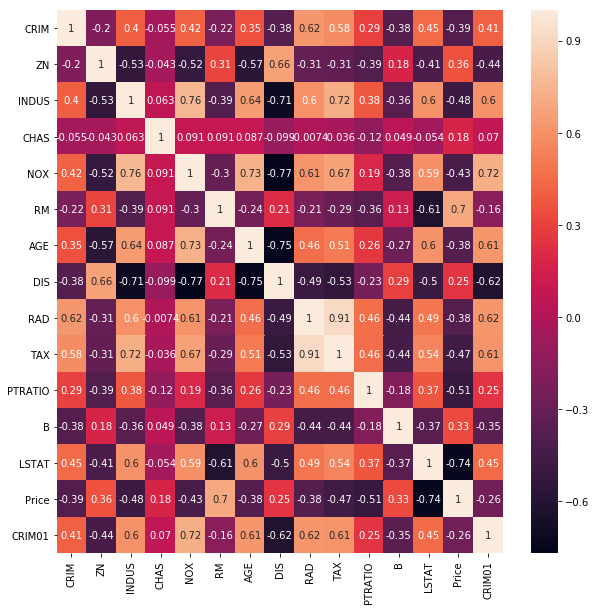

In [480]:
sns.heatmap(boston.corr(),annot=True)

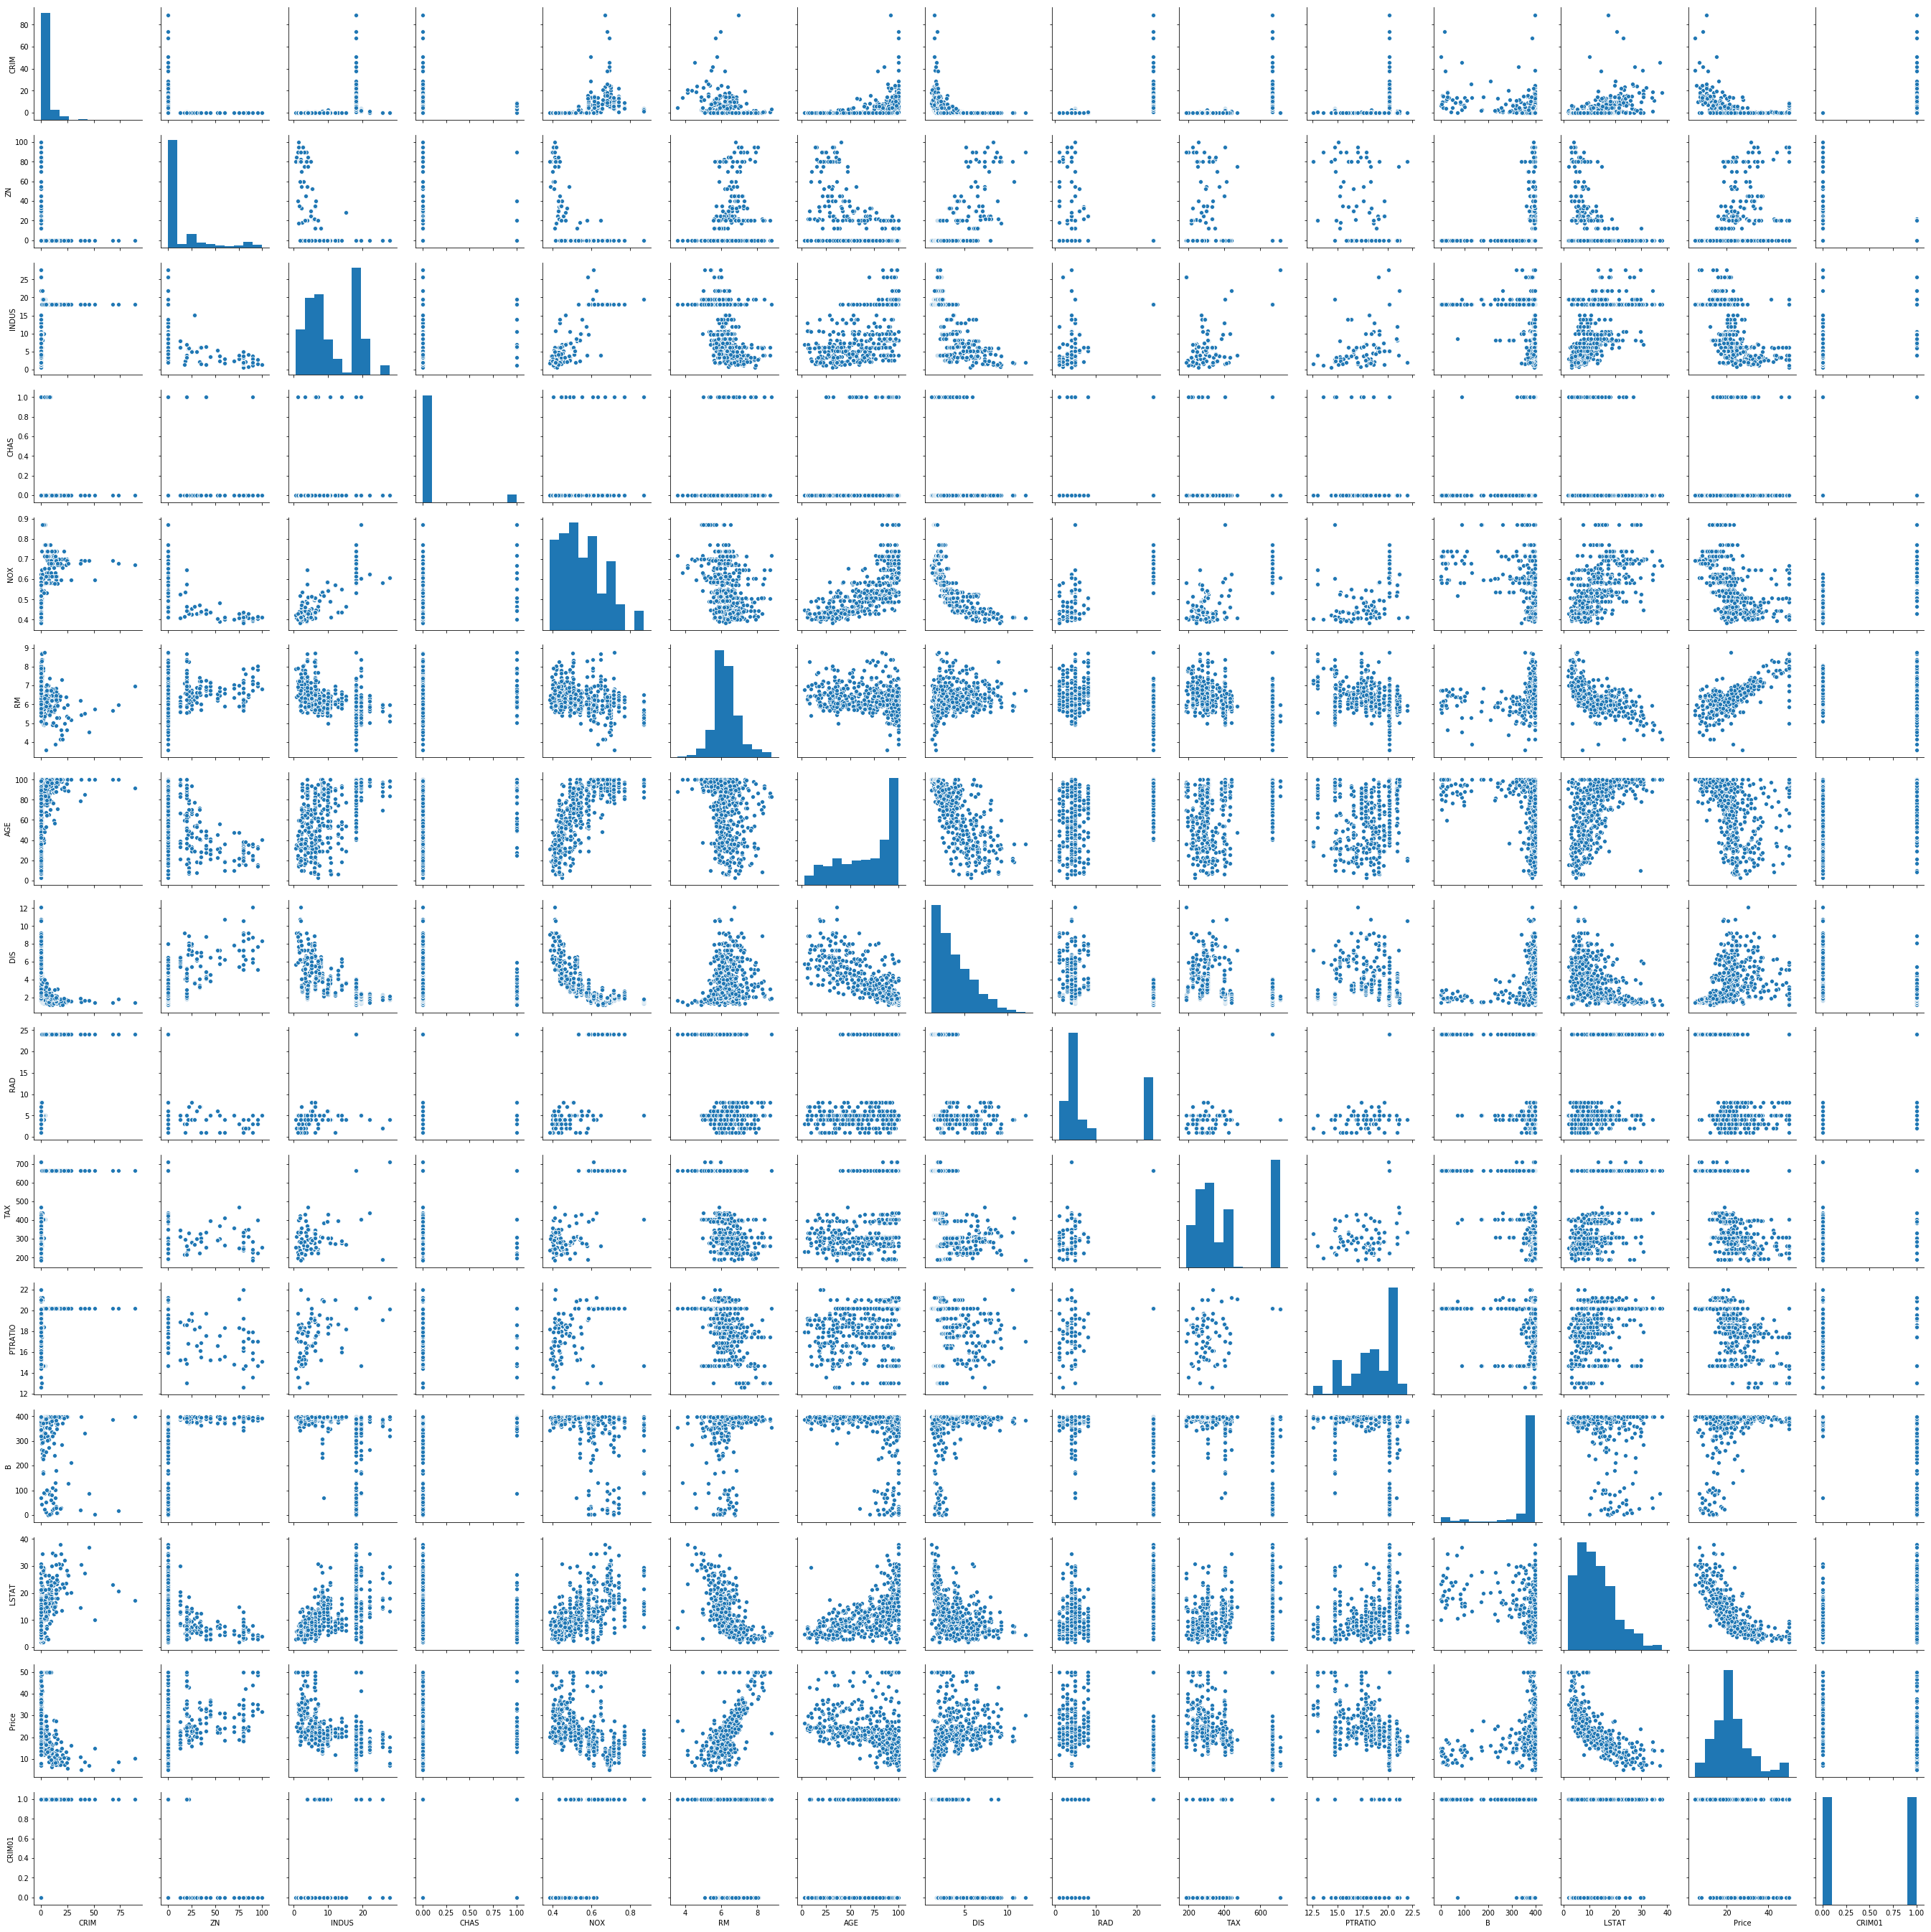

In [462]:
sns.pairplot(boston)

**ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV**

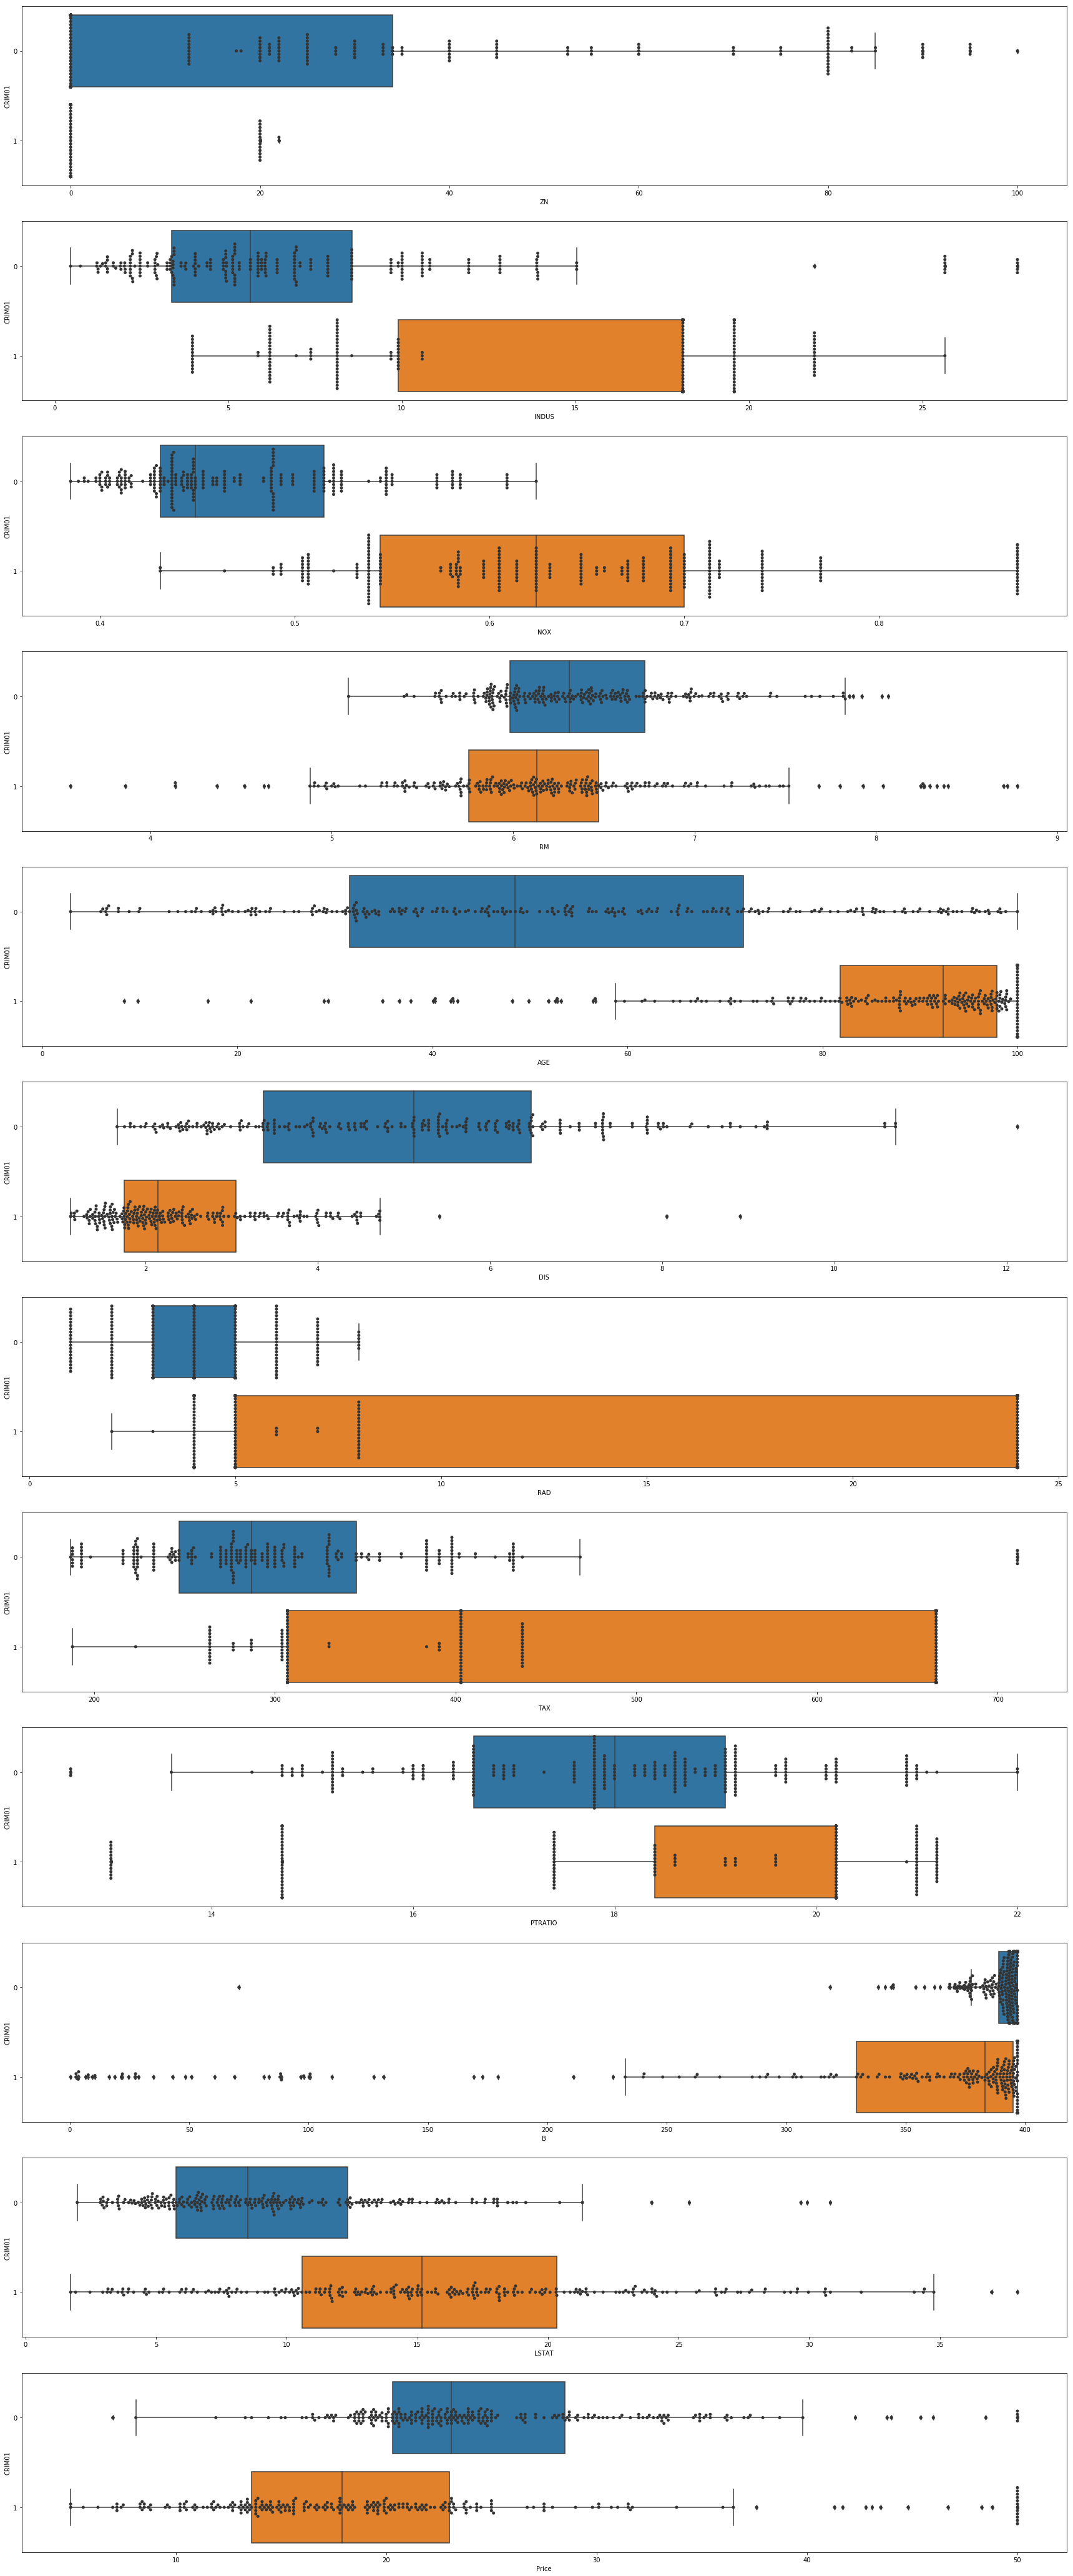

In [602]:
cont_fx = boston.drop(['CHAS', 'CRIM', 'CRIM01'], axis=1).columns
fig, axes = plt.subplots(figsize=(30, 75), nrows=len(cont_fx))
for idx, fx in enumerate(cont_fx):
    sns.boxplot(y='CRIM01', x=fx, data=boston, orient='h', ax=axes[idx])
    sns.swarmplot(y='CRIM01', x=fx, data=boston, color='.2', orient='h', ax=axes[idx])

**CHAS**

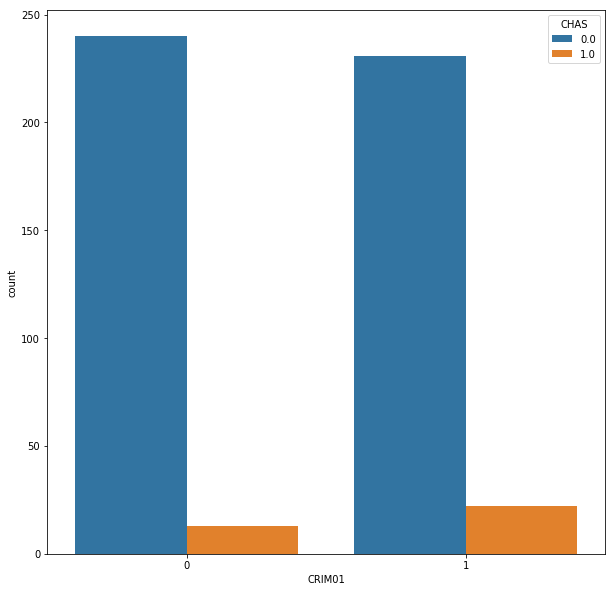

In [574]:
sns.countplot(x='CRIM01', hue='CHAS', data=boston)

**ZN - digging deeper**

- Investigating the unusual distribution

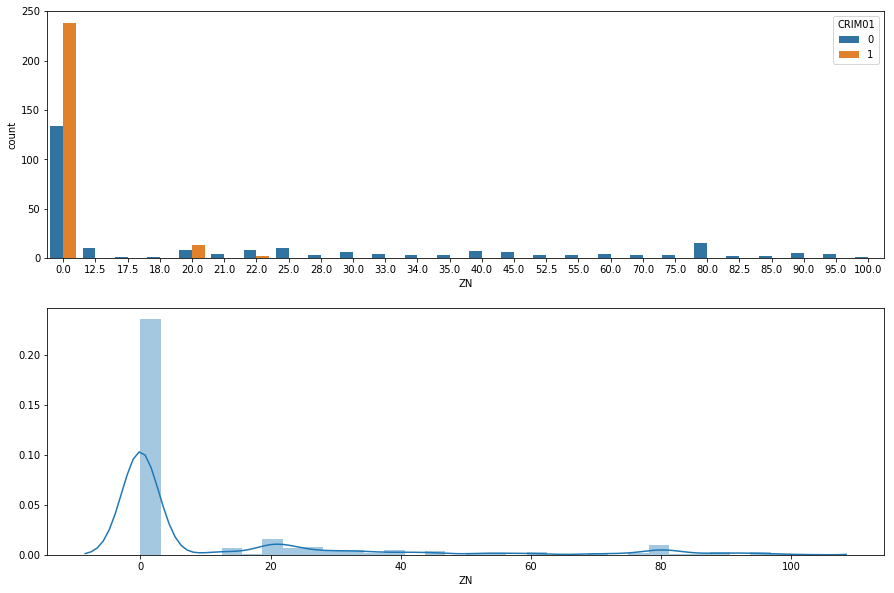

In [545]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,10), nrows=2)
sns.countplot(x='ZN', hue='CRIM01',data=boston, ax=ax1)
sns.distplot(boston['ZN'], ax=ax2)

**INDUS - digging deeper**

- Investigating the unusual distribution

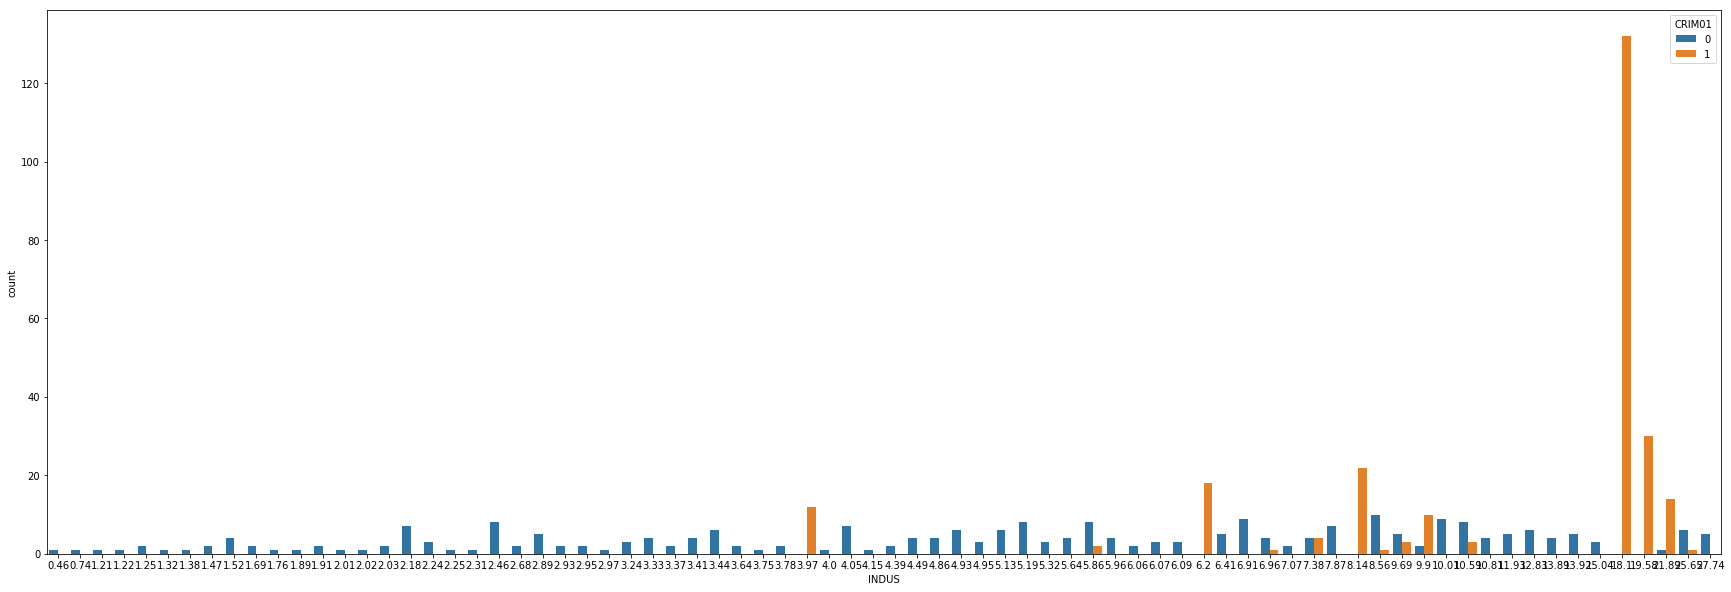

In [569]:
# Ideally this would be binned: a segmented histogram - seaborn doesn't support that.
fig, ax1 = plt.subplots(figsize=(30,10))
sns.countplot(x='INDUS', hue='CRIM01',data=boston, ax=ax1)

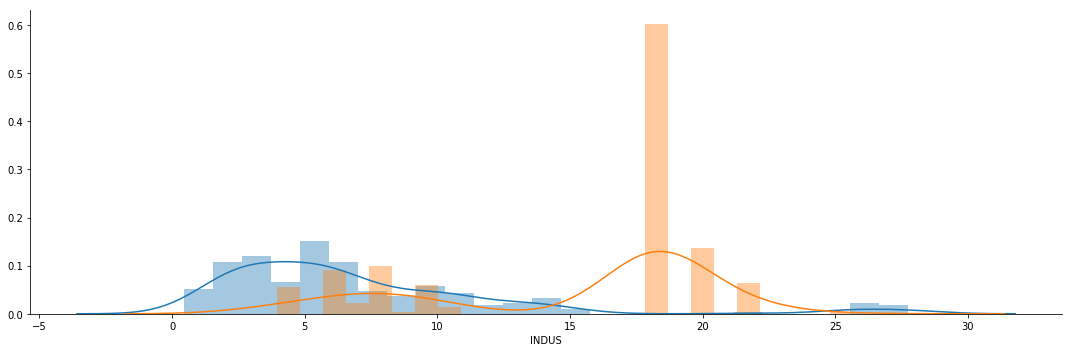

In [603]:
# Distplot doesn't support `hue` - https://github.com/mwaskom/seaborn/issues/861
# this hack makes the bins different sizes, but still - can see the picture.
g = sns.FacetGrid(boston, hue='CRIM01', height=5, aspect=3)
g = g.map(sns.distplot, 'INDUS', bins=25)

**Models**

In [614]:
train, test = train_test_split(boston, test_size=0.5)

 **Logistic Regression**

In [617]:
# Try all (2 ^ 13) - 1 combinations of independent variables

def logistic_reg_acc(formula):
    logit_model = smf.logit(formula=formula, data=train).fit()
    preds = (logit_model.predict(test) > 0.5)
    return (preds == test['CRIM01']).mean()

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    formula = 'CRIM01 ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)


Optimization terminated successfully.
         Current function value: 0.565024
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.692185
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.315831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.675831
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.521937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468931
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.445281
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.483819
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.658365
  

Optimization terminated successfully.
         Current function value: 0.566513
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.452833
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313752
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.366915
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.420694
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.451259
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.441143
  

Optimization terminated successfully.
         Current function value: 0.430641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.440848
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.431897
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.348031
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.401562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426634
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.416294
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.424178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.425477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377209
  

Optimization terminated successfully.
         Current function value: 0.311803
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300447
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312230
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306348
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309610
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.459919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.375601
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.426304
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.511515
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491182
  

Optimization terminated successfully.
         Current function value: 0.442550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305957
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301523
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.268159
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.306138
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310324
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310305
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308770
 

Optimization terminated successfully.
         Current function value: 0.521221
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.561844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496843
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520150
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.505875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299053
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269852
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.307424
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309097
 

Optimization terminated successfully.
         Current function value: 0.396870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.467258
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.484467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.492169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464241
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.465526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.476465
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.345303
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347053
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.341916
 

Optimization terminated successfully.
         Current function value: 0.440871
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308192
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307354
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.271626
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.308519
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311233
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303673
 

Optimization terminated successfully.
         Current function value: 0.426429
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.336725
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347940
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343455
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346842
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346805
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.401299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398607
  

Optimization terminated successfully.
         Current function value: 0.439103
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.419653
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.411577
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.440300
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.481907
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.467522
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.455215
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.480442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.590972
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550520
  

Optimization terminated successfully.
         Current function value: 0.306575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307712
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310097
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302075
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307134
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296032
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311401
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303970
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308843
  

Optimization terminated successfully.
         Current function value: 0.490908
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.501669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.352372
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354934
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348511
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.350312
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354357
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.405469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399398
  

Optimization terminated successfully.
         Current function value: 0.401906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397111
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.397112
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.396140
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.436108
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.441847
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445301
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437599
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.421113
  

Optimization terminated successfully.
         Current function value: 0.268006
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265249
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304374
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306137
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299796
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307938
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310142


Optimization terminated successfully.
         Current function value: 0.413581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.392758
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435791
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.426471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.427690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305555
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298905
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269772
  

Optimization terminated successfully.
         Current function value: 0.465500
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.475774
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.345193
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346975
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.341913
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345247
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347237
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.398476
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.393761
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.398370
 

Optimization terminated successfully.
         Current function value: 0.250718
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.295917
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293591
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.295811
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280614
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296614
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.300015
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.282468
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296424
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.281123
 

Optimization terminated successfully.
         Current function value: 0.339976
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.395117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.391268
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.396383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434391
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.443917
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.432403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435948
  

Optimization terminated successfully.
         Current function value: 0.269683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.305096
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306478
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308664
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304245
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310748
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300140
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306339
 

Optimization terminated successfully.
         Current function value: 0.449130
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.444386
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.439808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.429172
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303113
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.267848
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.302235
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303371
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304497
 

Optimization terminated successfully.
         Current function value: 0.420975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411314
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.416234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420196
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.346679
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357182
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353057
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.357601
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343921
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.411770
  

Optimization terminated successfully.
         Current function value: 0.329774
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334420
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336677
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343261
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346604
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346736
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342988
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.341055
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342632
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.395274
  

Optimization terminated successfully.
         Current function value: 0.295177
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301276
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288082
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303620
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293661
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298201
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.250395
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254108
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.256982


Optimization terminated successfully.
         Current function value: 0.437123
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.436262
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.441507
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.447806
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.375034
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.365924
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.374359
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.373641
  

Optimization terminated successfully.
         Current function value: 0.290972
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300217
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282486
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302202
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290213
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297060
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.250394
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254038
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.256983


Optimization terminated successfully.
         Current function value: 0.257056
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267474
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.306603
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293169
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300524
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293841
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344719
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348438
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343233


Optimization terminated successfully.
         Current function value: 0.398980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394999
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.391952
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.393428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.436766
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.442906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435391
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365767
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.373992
  

Optimization terminated successfully.
         Current function value: 0.395171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.410204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.411808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.352169
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.352680
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352794
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353044
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.350358
 

Optimization terminated successfully.
         Current function value: 0.290969
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.295975
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.292793
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.297572
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287961
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.254531
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.264458
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266252
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267052
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.26249

Optimization terminated successfully.
         Current function value: 0.423070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413774
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.407635
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.414025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.330053
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.339984
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336520
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338248
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336500
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.393429

Optimization terminated successfully.
         Current function value: 0.333031
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.389377
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.394534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392041
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381533
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413231
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.408244
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412268
 

Optimization terminated successfully.
         Current function value: 0.281852
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296127
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.280836
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285417
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.248705
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250924
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.253161
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.268192
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2685

Optimization terminated successfully.
         Current function value: 0.435823
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.442143
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.351392
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.348277
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.355787
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.349835
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346047
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.351967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348646
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.35148

Optimization terminated successfully.
         Current function value: 0.285061
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.248443
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250939
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252845
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.253101
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266150
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266587
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252002
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.268310
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.251592
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267910
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.256818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254974
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262237
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.305635
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291403
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295591
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.2927

Optimization terminated successfully.
         Current function value: 0.338221
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.331555
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336778
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337944
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336406
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.340783
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.339832
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.337718
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.332857
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3359

Optimization terminated successfully.
         Current function value: 0.303880
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.263217
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.297482
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298467
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302562
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299307
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.255730
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261707


Optimization terminated successfully.
         Current function value: 0.394459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.395843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397858
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.415389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.423224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408924
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412323
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.373112
  

Optimization terminated successfully.
         Current function value: 0.368998
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.372139
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.365082
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.361648
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.361340
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.374421
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.370705
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.369203
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.361880
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.428680
  

Optimization terminated successfully.
         Current function value: 0.291824
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.294426
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.248217
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250941
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252426
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255740
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261542
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261676
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258173
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.26

Optimization terminated successfully.
         Current function value: 0.398886
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405167
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390202
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.398041
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.423061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.416094
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.423416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413854
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.336658
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.329698
  

Optimization terminated successfully.
         Current function value: 0.342678
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.340920
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342331
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337736
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.394618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.391202
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385574
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.406200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362471
  

Optimization terminated successfully.
         Current function value: 0.294538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.247943
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250897
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252715
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255748
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.263846
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265048
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258188
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267322
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.423852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417358
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.404683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.412204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.475766
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.481892
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.491417
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352022
  

Optimization terminated successfully.
         Current function value: 0.340124
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.344822
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345558
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346118
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.348435
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.348656
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.343587
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.396911
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.396521
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.395350

Optimization terminated successfully.
         Current function value: 0.288621
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290605
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.245582
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247033
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250012
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251942
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260697
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261976
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252

Optimization terminated successfully.
         Current function value: 0.366774
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352765
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.363852
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354258
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.417580
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.402040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.410212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402793
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.467828
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.344073
  

Optimization terminated successfully.
         Current function value: 0.252034
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260244
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261456
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262322
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.296270
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295835
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297802
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294828
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.2988

Optimization terminated successfully.
         Current function value: 0.406870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345513
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.343031
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.342505
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.346358
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.345762
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.346806
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.347856
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.347587
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3

Optimization terminated successfully.
         Current function value: 0.403871
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390613
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.381295
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.410622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.254727
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.287732
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.292338
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288612
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.291087
 

Optimization terminated successfully.
         Current function value: 0.259530
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257997
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.294867
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296224
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288951
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296002
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289758
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298973
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290404


Optimization terminated successfully.
         Current function value: 0.325785
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329021
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.334909
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336910
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336407
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.334339
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329286
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.332851
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.3

Optimization terminated successfully.
         Current function value: 0.380932
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.255205
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.288042
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.291799
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288011
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.291230
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287808
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.252006
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261946
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.263385

Optimization terminated successfully.
         Current function value: 0.289991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298566
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291720
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292084
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300132
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290228
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288608
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293904
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.242397
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242228
 

Optimization terminated successfully.
         Current function value: 0.390581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.391431
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387672
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.385648
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.385897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427877
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.438040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.437594
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.427508
  

Optimization terminated successfully.
         Current function value: 0.276134
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287038
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287996
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.276845
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.286669
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.277702
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.282816
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.246219
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247832
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247695


Optimization terminated successfully.
         Current function value: 0.247709
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.263131
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254739
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251605
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258265
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.297868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286923
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284777
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289090
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.2859

Optimization terminated successfully.
         Current function value: 0.391005
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331210
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336363
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.337865
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.330847
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329985
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.333779
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336271
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.332788
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3

Optimization terminated successfully.
         Current function value: 0.260146
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262125
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261289
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.293420
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294037
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292811
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.294723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297927
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287184

Optimization terminated successfully.
         Current function value: 0.352382
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.356944
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.341286
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.352987
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.335156
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.342472
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.405729
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.410131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405167

Optimization terminated successfully.
         Current function value: 0.331897
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335472
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.327079
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.328622
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.330145
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342525
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.340920
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.341732
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337443
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.394548


Optimization terminated successfully.
         Current function value: 0.302110
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284150
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285913
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296299
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290214
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.245569
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247021
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249693
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251935
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.25803

Optimization terminated successfully.
         Current function value: 0.338354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352358
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334267
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.342467
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335977
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.404919
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.388663
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.396581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389346
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.411861

Optimization terminated successfully.
         Current function value: 0.299021
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297274
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296679
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288706
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298149
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.246181
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249285
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252807


Optimization terminated successfully.
         Current function value: 0.278373
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.288402
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.278363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.247598
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241519
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252195
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255767
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.290643
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.3442

Optimization terminated successfully.
         Current function value: 0.339440
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343185
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.389214
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.394881
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245326
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247029
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248882
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250442
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.259141
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258

Optimization terminated successfully.
         Current function value: 0.342606
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.341847
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336607
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334997
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.341444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342454
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.335560
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.342133
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336936
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3932

Optimization terminated successfully.
         Current function value: 0.300503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.244798
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.253088
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252599
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249727
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.287924
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285769
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288946
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.2789

Optimization terminated successfully.
         Current function value: 0.329652
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.326230
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.330841
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.320951
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335495
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.339492
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.326794
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.339070
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.319369
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3

Optimization terminated successfully.
         Current function value: 0.377200
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.372936
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400017
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322543
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.326247
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.327789
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.322667
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.320682
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.32196

Optimization terminated successfully.
         Current function value: 0.262783
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247944
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258535
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.300511
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.283007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284742
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291889
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289556
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.24118

Optimization terminated successfully.
         Current function value: 0.324156
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329937
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.323536
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.325917
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.314485
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.323051
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335229
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.320166
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.328008
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.251570
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262106
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258307
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260183
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.294425
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294333
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286620
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294965
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290135
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.29202

Optimization terminated successfully.
         Current function value: 0.285905
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.239539
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242025
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.234914
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242156
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237593
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.238818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257087
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.240127
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.330473
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329972
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.332859
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336147
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.332779
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335363
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329477
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.389013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.38

Optimization terminated successfully.
         Current function value: 0.284471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237950
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239624
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.235503
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239635
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237263
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237636
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255435
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241502
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.254863
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.259437
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257553
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251453
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262886
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260767
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262554
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.293865
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292600
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.28

Optimization terminated successfully.
         Current function value: 0.243850
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.246331
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241048
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249233
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250154
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.259616
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247317
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.244313
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.339310
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334422
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337278
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.333281
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.392547
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.385449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.387604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.401122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339644
  

Optimization terminated successfully.
         Current function value: 0.247408
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257502
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249392
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243999
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254768
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.292166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.279225
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.275026
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285063
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.2763

Optimization terminated successfully.
         Current function value: 0.260964
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249604
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251101
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262279
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.294655
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293954
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.286699
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.24307

Optimization terminated successfully.
         Current function value: 0.394823
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336192
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.337819
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.340950
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.335296
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.386111
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.359020
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339074
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2418

Optimization terminated successfully.
         Current function value: 0.288887
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289734
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293769
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287520
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293636
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.240837
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241293
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243007
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241474

Optimization terminated successfully.
         Current function value: 0.267074
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.270624
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269817
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.245973
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241848
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239266
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248095
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251525
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.286410
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.3228

Optimization terminated successfully.
         Current function value: 0.326783
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.374362
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.326698
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.240272
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239872
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239538
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241442
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250610
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247842
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.322849
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.320256
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.317800
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.312438
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.319553
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.330986
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.319268
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.326212
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.319398
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.237754
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247331
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248482
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.284464
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.237600
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239581
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.234874
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239616
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237060
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.247642
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.281278
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.235938
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.224524
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.225102
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.233683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230248
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.259718
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.235234
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.23

Optimization terminated successfully.
         Current function value: 0.241483
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.240819
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245709
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245681
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247408
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255822
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.246905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242828
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.237955
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247890
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247042
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.280502
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.242152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229738
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231443
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243573
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.236649
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.227619
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230851
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.332648
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239787
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239672
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239538
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241426
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248633
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.246570
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.320738
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.317823
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.316612
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.310531
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.316501
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.330893
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.318539
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.324756
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.318486
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.233931
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229895
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.236687
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.234857
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237521
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.249196
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.230874
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.233514
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.240681
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.240506
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.236386
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.232857
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242933
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241145
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.271967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.236594
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231556
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.322657
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3

Optimization terminated successfully.
         Current function value: 0.224982
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.233115
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229293
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.258600
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.233846
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.221504
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.223853
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.311956
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.232119
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

[[0.9288537549407114, 'CRIM01 ~ INDUS + NOX + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ ZN + INDUS + NOX + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ ZN + INDUS + NOX + RAD + PTRATIO + LSTAT'],
 [0.924901185770751, 'CRIM01 ~ ZN + INDUS + CHAS + NOX + RAD + PTRATIO'],
 [0.924901185770751,
  'CRIM01 ~ ZN + INDUS + CHAS + NOX + RAD + PTRATIO + LSTAT'],
 [0.924901185770751, 'CRIM01 ~ ZN + INDUS + NOX + RM + RAD + PTRATIO + LSTAT'],
 [0.9209486166007905, 'CRIM01 ~ INDUS + NOX + RM + RAD + PTRATIO + LSTAT'],
 [0.9209486166007905, 'CRIM01 ~ INDUS + NOX + RM + RAD + PTRATIO + B + LSTAT'],
 [0.9209486166007905,
  'CRIM01 ~ ZN + INDUS + CHAS + NOX + RM + RAD + PTRATIO + LSTAT'],
 [0.9209486166007905,
  'CRIM01 ~ ZN + INDUS + NOX + RM + RAD + PTRATIO + B + LSTAT'],
 [0.9169960474308301,
  'CRIM01 ~ CHAS + NOX + RM + DIS + RAD + PTRATIO + LSTAT'],
 [0.9169960474308301,
  'CRIM01 ~ INDUS + CHAS + NOX + RM + RAD + PTRATIO + B + LSTAT'],
 [0.9169960474308301,
  'CRIM01 ~ ZN + INDUS + CHA

**LOGIT: TOP 5 Models**

`0.9288537549407114` `'CRIM01 ~ INDUS + NOX + RAD + PTRATIO'`

`0.9288537549407114` `'CRIM01 ~ ZN + INDUS + NOX + RAD + PTRATIO'`

`0.9288537549407114` `'CRIM01 ~ ZN + INDUS + NOX + RAD + PTRATIO + LSTAT'`

`0.924901185770751` `'CRIM01 ~ ZN + INDUS + CHAS + NOX + RAD + PTRATIO'`

`0.924901185770751` `'CRIM01 ~ ZN + INDUS + CHAS + NOX + RAD + PTRATIO + LSTAT'`

In [627]:
# Interesting that models which use CHAS are in the top 5, given that it is the variable that is least
# strongly correlated with CRIM01
# .. we can see from the correlation heatmap that many of the predictors are significantly colinear, which
# may explain this empirical result.
abs((boston.corr()['CRIM01'])).sort_values(ascending=False)

CRIM01     1.000000
NOX        0.723235
RAD        0.619786
DIS        0.616342
AGE        0.613940
TAX        0.608741
INDUS      0.603260
LSTAT      0.453263
ZN         0.436151
CRIM       0.407321
B          0.351211
Price      0.263017
PTRATIO    0.253568
RM         0.156372
CHAS       0.070097
Name: CRIM01, dtype: float64

In [665]:
# Try out some interaction terms

indi_vars = ['INDUS', 'NOX', 'RAD', 'PTRATIO', 'DIS', 'AGE', 'TAX', 'LSTAT']
#indi_vars = ['INDUS', 'NOX', 'RAD', 'PTRATIO', 'DIS', 'AGE', 'TAX', 'LSTAT', 'ZN', 'B', 'Price'] # gives same as above
#indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns # crashes
res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    # no interactions
    formula = 'CRIM01 ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])
    # interactions
    if len(indi_var_combo) == 2:
        formula = 'CRIM01 ~ ' + ' * '.join(indi_var_combo)
    elif len(indi_var_combo) > 2:
        choose_2 = list(combinations(indi_var_combo, 2))
        for pair in choose_2:
            rem = set(indi_var_combo) - set(pair)
            formula = 'CRIM01 ~ ' + ' * '.join(pair) + ' + ' + ' + '.join(rem)
            res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)


Optimization terminated successfully.
         Current function value: 0.466418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445281
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.658365
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.468931
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.521937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.483819
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574287
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315554
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.386291
  

Optimization terminated successfully.
         Current function value: 0.422655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.422350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396736
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401326
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401440
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.421773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420550
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424129
  

Optimization terminated successfully.
         Current function value: 0.367435
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.440967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.427781
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.440430
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.440918
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.414402
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.400146
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.411540
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.405866
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348750
 

Optimization terminated successfully.
         Current function value: 0.266472
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.267685
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.267817
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265726
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258264
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.256525
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250205
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.258253
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258055
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.303732
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308048
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303792
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308824
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.304943
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297646
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347940
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347122
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.347464
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343848
 

Optimization terminated successfully.
         Current function value: 0.401215
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.358581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.395821
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.421175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.421769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420481
  

Optimization terminated successfully.
         Current function value: 0.259588
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.269542
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.263684
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262094
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266063
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265999
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.261983
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.264345
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265759
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.305853
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298898
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299580
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299389
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294836
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296512
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299265
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296232
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297042
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298100
  

Optimization terminated successfully.
         Current function value: 0.347126
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.343999
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342337
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345538
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347145
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346310
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346924
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346631
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.346057
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.342701

Optimization terminated successfully.
         Current function value: 0.263320
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266864
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.264609
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.264368
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266913
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.261319
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258620
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.266399
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.259241
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.297318
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299292
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290234
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298392
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282298
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294834
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296614
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299171
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.291722
  

Optimization terminated successfully.
         Current function value: 0.298435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300248
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293704
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300400
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300949
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.294775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299313
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300951
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287401
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.343265
  

Optimization terminated successfully.
         Current function value: 0.343305
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342651
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.338426
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342950
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339045
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343256
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.340949
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.338963
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342926
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342168

Optimization terminated successfully.
         Current function value: 0.397993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397895
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.393784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.262160
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261295
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.257491
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258635

Optimization terminated successfully.
         Current function value: 0.246938
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250250
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265655
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265611
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.261791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.263945
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251774
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265368
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.264411
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.296066
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296276
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297868
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297509
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.287514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.345557
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339041
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345557
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.343189
 

Optimization terminated successfully.
         Current function value: 0.259320
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.258363
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.254170
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.259651
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258308
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.247224
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243852
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.232824
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.246476
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.244684
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.242329
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251087
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252246
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.251450
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.251753
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252146
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252212
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250864
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.293204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291947
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298309
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.284458
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296915
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297945
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290134
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298385
  

Optimization terminated successfully.
         Current function value: 0.341116
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334419
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.323518
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.334416
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.331947
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.334415
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.331140
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.327176
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.334006
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3325

Optimization terminated successfully.
         Current function value: 0.261976
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261177
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.256818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258598
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260868
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245464
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.260901
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.260954
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.261288
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.342479
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342327
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342348
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.334727
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245569
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242234
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231343
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.244622
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231123
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.244

Optimization terminated successfully.
         Current function value: 0.245278
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.244680
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.239554
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245553
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245255
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231209
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242417
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.245517
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.231928
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.243472
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.235555
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.242745
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.240232
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.243563
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.242896
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.238147
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237420
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.243569
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

[[0.932806324110672, 'CRIM01 ~ DIS * TAX + NOX + LSTAT + RAD + PTRATIO'],
 [0.932806324110672,
  'CRIM01 ~ DIS * TAX + RAD + PTRATIO + NOX + LSTAT + INDUS'],
 [0.9288537549407114, 'CRIM01 ~ INDUS + NOX + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ INDUS * NOX + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ NOX * RAD + INDUS + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ INDUS * NOX + LSTAT + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ DIS * TAX + NOX + RAD + PTRATIO'],
 [0.9288537549407114, 'CRIM01 ~ DIS * TAX + NOX + RAD + INDUS + PTRATIO'],
 [0.924901185770751, 'CRIM01 ~ RAD * PTRATIO + NOX + INDUS'],
 [0.924901185770751, 'CRIM01 ~ RAD * PTRATIO + NOX + LSTAT + INDUS'],
 [0.924901185770751, 'CRIM01 ~ DIS * TAX + AGE + PTRATIO + NOX + RAD + INDUS'],
 [0.9209486166007905, 'CRIM01 ~ INDUS * RAD + NOX + TAX + PTRATIO'],
 [0.9209486166007905, 'CRIM01 ~ RAD * LSTAT + NOX + INDUS + PTRATIO'],
 [0.9209486166007905, 'CRIM01 ~ INDUS * RAD + NOX + LSTAT + TAX + PTRATIO'],
 [0.9209486

**LOGIT with an interaction: TOP 5 Models**

`0.932806324110672` `'CRIM01 ~ DIS * TAX + NOX + LSTAT + RAD + PTRATIO'`

`0.932806324110672` `'CRIM01 ~ DIS * TAX + RAD + PTRATIO + NOX + LSTAT + INDUS'`

`0.9288537549407114` `'CRIM01 ~ INDUS + NOX + RAD + PTRATIO'`

`0.9288537549407114` `'CRIM01 ~ INDUS * NOX + RAD + PTRATIO'`

`0.9288537549407114` `'CRIM01 ~ NOX * RAD + INDUS + PTRATIO'`

In [663]:
# try out a quadratic term

indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns
res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    # no interactions
    formula = 'CRIM01 ~ ' + ' + '.join(indi_var_combo)
    res.append([logistic_reg_acc(formula), formula])
    # try quadratic of each feature
    if len(indi_var_combo) > 2:
        for iv in indi_var_combo:
            formula = 'CRIM01 ~ ' + 'np.power({}, 2)'.format(iv) + ' + ' + ' + '.join(indi_var_combo)
            #print(formula)
            res.append([logistic_reg_acc(formula), formula])

sorted(res, key=lambda x: x[0], reverse=True)

Optimization terminated successfully.
         Current function value: 0.466418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315831
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.445281
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.658365
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.468931
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.521937
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.483819
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574287
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565024
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315554
  

Optimization terminated successfully.
         Current function value: 0.384176
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.383667
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.366915
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.365215
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.366757
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.351066
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.426634
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.386220
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.423768

Optimization terminated successfully.
         Current function value: 0.273945
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.268034
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.270850
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.270334
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.270829
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.268172
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.304358
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304316
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.304195
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.29

Optimization terminated successfully.
         Current function value: 0.378007
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.377938
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.281104
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.370788
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.348750
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.348683
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.348533
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338584
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354637
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.35456

Optimization terminated successfully.
         Current function value: 0.515777
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.401291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401151
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401214
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.449399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.444944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.443322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454293
 

Optimization terminated successfully.
         Current function value: 0.297947
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308462
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.308510
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305527
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.303673
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.285966
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303181
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.298360
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301351
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302598

Optimization terminated successfully.
         Current function value: 0.346842
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339688
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346703
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.346669
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.344302
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343004
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339078
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342774
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.341774
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.324288


Optimization terminated successfully.
         Current function value: 0.422173
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418101
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.421621
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.405194
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418395
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404119
  

Optimization terminated successfully.
         Current function value: 0.255761
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255626
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.255547
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.248073
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241369
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.269401
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.268942
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.269401
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.267419
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.294745
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296590
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.303902
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.293709
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303745
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296227
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.295980
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.291374

Optimization terminated successfully.
         Current function value: 0.345842
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.345231
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.331681
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.330980
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347224
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347167
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.347003
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338273
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.343242
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342462


Optimization terminated successfully.
         Current function value: 0.419006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343489
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.417948
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.406094
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.399966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395128
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396092
 

Optimization terminated successfully.
         Current function value: 0.246853
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255521
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.255545
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.246730
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237673
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.265969
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258698
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.265969
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.265878
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.2

Optimization terminated successfully.
         Current function value: 0.295183
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303242
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.301965
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304373
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299098
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.310322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297943
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308461
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.308509
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302464

Optimization terminated successfully.
         Current function value: 0.309796
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.346604
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338454
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.346512
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.302682
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.346513
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.344288
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.341086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336839
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.34100

Optimization terminated successfully.
         Current function value: 0.338584
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.342363
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.341347
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337699
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.324275
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.348498
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.339891
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.347884
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.340864
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.329130

Optimization terminated successfully.
         Current function value: 0.397995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.393338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.386070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389892
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395130
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.374091
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.420908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404952
 

Optimization terminated successfully.
         Current function value: 0.264189
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.265651
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.255980
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.264133
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.262108
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257968
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.257758
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.257963
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.253137
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.290593
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295545
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294023
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.300015
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.299169
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.298443
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296722
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292184
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.298342
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.301062

Optimization terminated successfully.
         Current function value: 0.331920
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.328080
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.344112
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.344090
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.278192
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.341574
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.340424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.329359
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.373992
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.37

Optimization terminated successfully.
         Current function value: 0.398673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397003
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.393890
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.396383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394948
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.390299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376803
 

Optimization terminated successfully.
         Current function value: 0.262618
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.255882
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258950
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.258745
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255899
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252084
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254809
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.255827
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.252870
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.291415
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.289257
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293179
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.291563
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.299537
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288065
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.298388
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.298381
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.296651
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291760


Optimization terminated successfully.
         Current function value: 0.302681
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.343058
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.336971
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.338423
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.337226
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.332429
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.337127
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.273721
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.337087
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.3304

Optimization terminated successfully.
         Current function value: 0.327679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.319991
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.326672
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.326295
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.397590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.367533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397540

Optimization terminated successfully.
         Current function value: 0.258662
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.245840
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.244738
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.245040
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.241338
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237938
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.224333
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.237623
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.246414
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.295150
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.292313
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.290228
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295105
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.287049
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.293322
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.299953
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299751
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.295120
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297973

Optimization terminated successfully.
         Current function value: 0.254158
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252825
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.254317
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250577
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.252960
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.254313
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.249244
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.250761
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.248902
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.249152
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.255042
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.245580
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.241336
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.239517
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.245460
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.244134
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.229464
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.236499
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.330379
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.330410
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.323101
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.329052
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.325002
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.328354
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.254563
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.327132
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.305228
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.32

Optimization terminated successfully.
         Current function value: 0.291134
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.287723
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.286818
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.289325
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.290588
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285257
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.288869
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.336363
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.336116
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.26980

Optimization terminated successfully.
         Current function value: 0.254490
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.324523
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.316172
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.301426
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.316816
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.308218
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.239624
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.235239
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.239133
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.2

[[0.9604743083003953, 'CRIM01 ~ np.power(TAX, 2) + NOX + RAD + PTRATIO + TAX'],
 [0.9486166007905138,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + DIS + ZN'],
 [0.9486166007905138,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + LSTAT + ZN'],
 [0.9486166007905138,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + DIS + AGE + ZN'],
 [0.9486166007905138,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + AGE + LSTAT + ZN'],
 [0.9446640316205533,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + AGE + ZN'],
 [0.9446640316205533,
  'CRIM01 ~ np.power(TAX, 2) + NOX + RAD + PTRATIO + TAX + LSTAT'],
 [0.9446640316205533,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + DIS + LSTAT + ZN'],
 [0.9446640316205533,
  'CRIM01 ~ np.power(TAX, 2) + NOX + RAD + PTRATIO + TAX + LSTAT + ZN'],
 [0.9446640316205533,
  'CRIM01 ~ np.power(PTRATIO, 2) + RAD + PTRATIO + DIS + AGE + LSTAT + ZN'],
 [0.9407114624505929,
  'CRIM01 ~ np.power(TAX, 2) + NOX + RAD + PTRATIO + TAX + ZN'],
 [0.94071146245

**LOGIT with a quadratic: TOP 5 Models**

`0.9604743083003953` `'CRIM01 ~ np.power(TAX, 2)+NOX + RAD + TAX + PTRATIO'`

`0.9486166007905138` `'CRIM01 ~ np.power(PTRATIO, 2)+DIS + RAD + ZN + PTRATIO'`

`0.9486166007905138` `'CRIM01 ~ np.power(PTRATIO, 2)+ZN + LSTAT + PTRATIO + RAD'`

`0.9486166007905138` `'CRIM01 ~ np.power(PTRATIO, 2)+ZN + DIS + AGE + PTRATIO + RAD'`

**LDA**

In [667]:
# Try all combinations of independent variables

def lda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    lda = LinearDiscriminantAnalysis()
    lda.fit(train[indi_vars], train['CRIM01'])
    preds = lda.predict(test[indi_vars])
    return (preds == test['CRIM01']).mean()

indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    indi_var_combo
    res.append([lda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

# From inspection, the distributions of the predictors have different variances - this violates the LDA assumption.
# I could try and performing different transformations on each of the predictors until the transformed distributions
# have similar variances.. but I'll save that for another day.

[[0.8893280632411067, ('ZN', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B')],
 [0.8893280632411067, ('ZN', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8853754940711462, ('ZN', 'AGE', 'RAD')],
 [0.8853754940711462, ('ZN', 'AGE', 'RAD', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8853754940711462, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8814229249011858, ('ZN', 'CHAS', 'AGE', 'RAD')],
 [0.8814229249011858, ('ZN', 'AGE', 'RAD', 'TAX')],
 [0.8814229249011858, ('ZN', 'AGE', 'RAD', 'LS

**LDA: TOP 5 Models**

`0.8893280632411067` `'ZN', 'AGE', 'RAD', 'TAX', 'B'`

`0.8893280632411067, 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B'`

`0.8893280632411067` `'ZN', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'`

`0.8893280632411067` `'ZN', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'`

`0.8893280632411067` `'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'`

**QDA**

In [690]:
def qda_reg_acc(indi_vars):
    indi_vars = [v for v in indi_vars]
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train[indi_vars], train['CRIM01'])
    preds = qda.predict(test[indi_vars])
    return (preds == test['CRIM01']).mean()

indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns

res = []
for indi_var_combo in list(powerset(indi_vars))[1:]:
    indi_var_combo
    res.append([lda_reg_acc(indi_var_combo), indi_var_combo])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.8893280632411067, ('ZN', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B')],
 [0.8893280632411067, ('ZN', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8893280632411067, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8853754940711462, ('ZN', 'AGE', 'RAD')],
 [0.8853754940711462, ('ZN', 'AGE', 'RAD', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'B', 'LSTAT')],
 [0.8853754940711462, ('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B')],
 [0.8853754940711462, ('ZN', 'CHAS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT')],
 [0.8814229249011858, ('ZN', 'CHAS', 'AGE', 'RAD')],
 [0.8814229249011858, ('ZN', 'AGE', 'RAD', 'TAX')],
 [0.8814229249011858, ('ZN', 'AGE', 'RAD', 'LS

**QDA: TOP 5 Models**

`0.8893280632411067` `'ZN', 'AGE', 'RAD', 'TAX', 'B'`

`0.8893280632411067` `'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B'`

`0.8893280632411067` `'ZN', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'`

`0.8893280632411067` `'ZN', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'`

`0.8893280632411067` `'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'`

**KNN**

In [692]:
def knn_reg_acc(indi_vars, k):
    indi_vars = [v for v in indi_vars]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(pd.DataFrame(train[indi_vars]), train['CRIM01'])
    preds = knn.predict(test[indi_vars])
    return (preds == test['CRIM01']).mean()

indi_vars = train.drop(['CRIM', 'CRIM01'], axis=1).columns

res = []
up_to_k = 5

for indi_var_combo in list(powerset(indi_vars))[1:]:
    for k in np.arange(1, up_to_k):
        res.append([knn_reg_acc(indi_var_combo, k), indi_var_combo, k])

sorted(res, key=lambda x: x[0], reverse=True)

[[0.9762845849802372, ('INDUS', 'RAD'), 2],
 [0.9762845849802372, ('INDUS', 'CHAS', 'RAD'), 2],
 [0.9762845849802372, ('INDUS', 'NOX', 'RAD'), 2],
 [0.9762845849802372, ('INDUS', 'DIS', 'RAD'), 1],
 [0.9762845849802372, ('INDUS', 'RAD', 'PTRATIO'), 2],
 [0.9762845849802372, ('INDUS', 'RAD', 'PTRATIO'), 4],
 [0.9762845849802372, ('DIS', 'RAD', 'PTRATIO'), 1],
 [0.9762845849802372, ('ZN', 'INDUS', 'TAX', 'PTRATIO'), 4],
 [0.9762845849802372, ('INDUS', 'CHAS', 'NOX', 'RAD'), 2],
 [0.9762845849802372, ('INDUS', 'CHAS', 'RAD', 'PTRATIO'), 2],
 [0.9762845849802372, ('INDUS', 'CHAS', 'RAD', 'PTRATIO'), 4],
 [0.9762845849802372, ('INDUS', 'NOX', 'DIS', 'RAD'), 1],
 [0.9762845849802372, ('INDUS', 'NOX', 'RAD', 'PTRATIO'), 2],
 [0.9762845849802372, ('INDUS', 'NOX', 'RAD', 'PTRATIO'), 4],
 [0.9762845849802372, ('CHAS', 'DIS', 'RAD', 'PTRATIO'), 1],
 [0.9762845849802372, ('NOX', 'DIS', 'RAD', 'PTRATIO'), 1],
 [0.9762845849802372, ('ZN', 'INDUS', 'CHAS', 'TAX', 'PTRATIO'), 4],
 [0.9762845849802372,

**KNN: TOP 5 Models**

`0.9762845849802372` `('INDUS', 'RAD'), k=2`

`0.9762845849802372` `('INDUS', 'CHAS', 'RAD') k=2`

`0.9762845849802372` `('INDUS', 'NOX', 'RAD') k=2`

`0.9762845849802372` `('INDUS', 'DIS', 'RAD') k=1`

`0.9762845849802372` `('INDUS', 'RAD', 'PTRATIO') k=2`

exploring the best classifier...

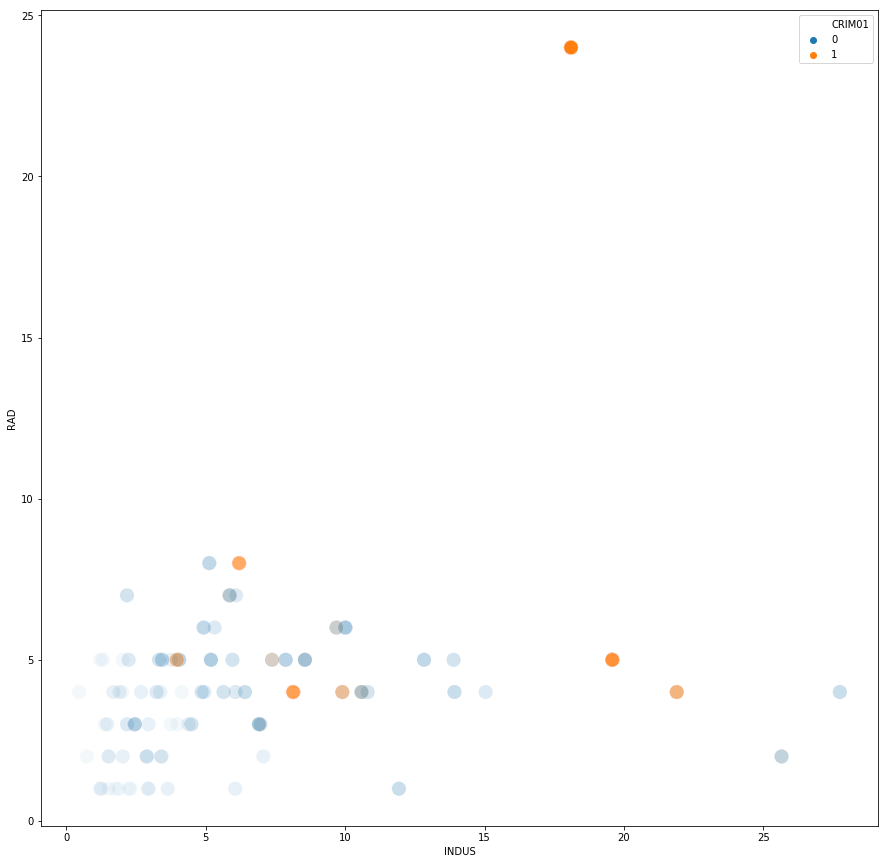

In [706]:
_, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x='INDUS', y='RAD', hue='CRIM01', data=boston, ax=ax, alpha=0.05, s=200)

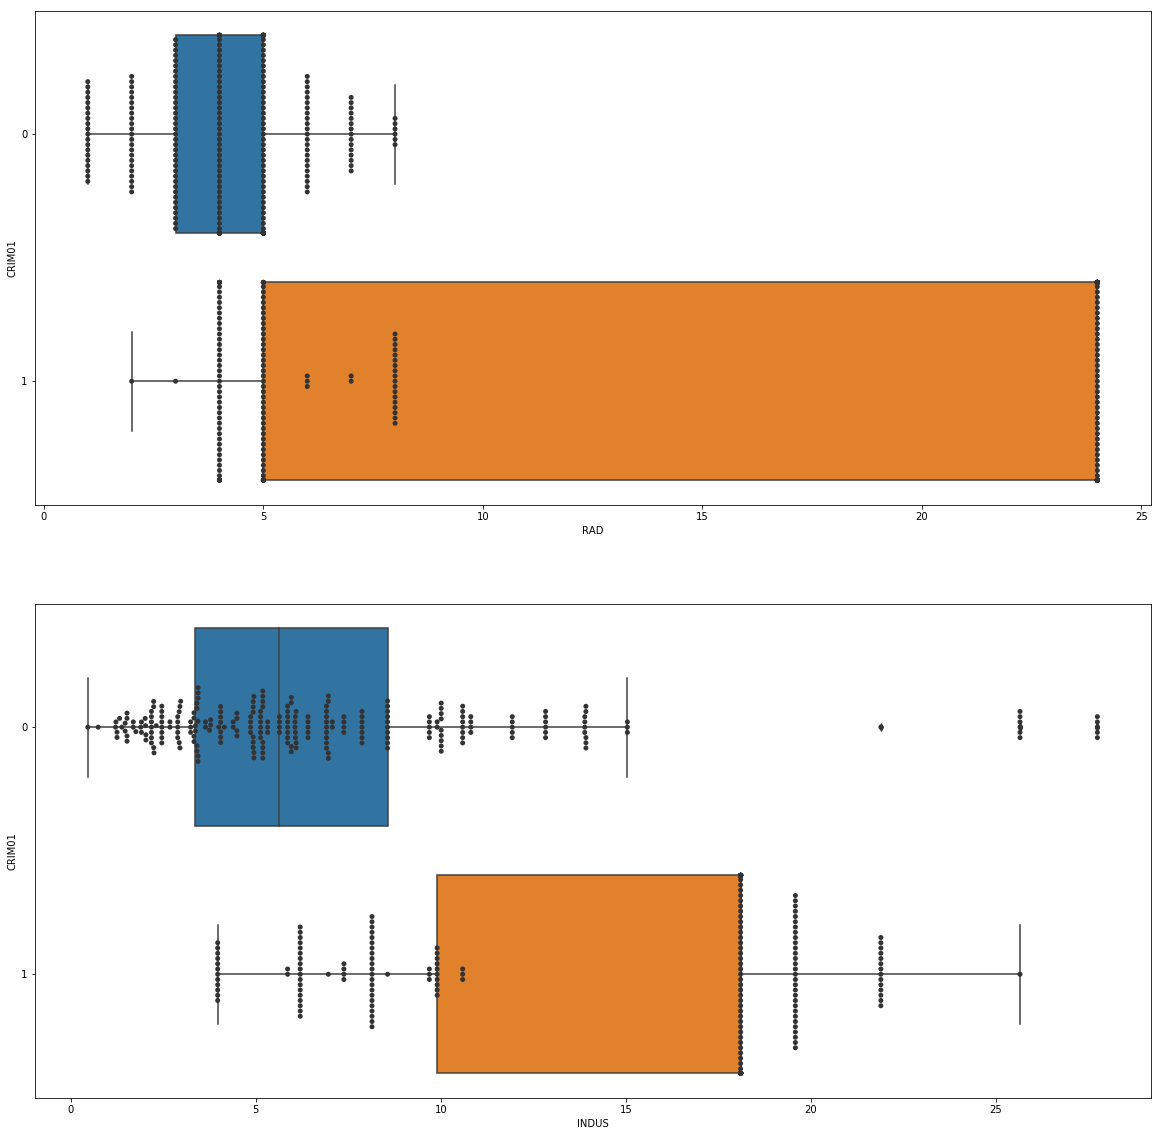

In [715]:
_, (ax1, ax2) = plt.subplots(figsize=(20,20), nrows=2)
sns.boxplot(y='CRIM01', x='RAD', data=boston, orient='h', ax=ax1)
sns.swarmplot(y='CRIM01', x='RAD', data=boston, color='.2', orient='h', ax=ax1)
sns.boxplot(y='CRIM01', x='INDUS', data=boston, orient='h', ax=ax2)
sns.swarmplot(y='CRIM01', x='INDUS', data=boston, color='.2', orient='h', ax=ax2)

In [722]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(pd.DataFrame(train[['INDUS', 'RAD']]), train['CRIM01'])
preds = knn.predict(test[['INDUS', 'RAD']])
conf_mtrx = metrics.confusion_matrix(preds, test['CRIM01'])
print_conf_matrix_stats(conf_mtrx)
pd.DataFrame(conf_mtrx, columns=['Low', 'High'], index=['Low', 'High'])

accuracy: 0.9762845849802372
npv: 0.9603174603174603
ppv: 0.9921259842519685
tpr: 0.9618320610687023
tnr: 0.9918032786885246


Low  High
Low   121     5
High    1   126

- The model only makes 6 mistakes: 5 false negatives and 1 false positive.
- We can see in the segmented scatter that these are the orange points in the bottom left.
- You could investigate these points and engineer a feature that gives better separation.